# Выявление закономерностей успешности игры

# Краткое описание проекта

Проект для известного интернет-магазина компьютерных игр, который занимается продажами по всему миру.

Необходимо выявить закономерности, определяющие успешность игры, основываясь на данных о продаже игр, жанрах, платформах и оценках пользователей и экспертов. Указаные данные взяты из открытых исторических источников. Кампания планируется на 2017 год и основывается на данных за 2016 год.

## Цель проекта 

Выявить определяющие успешность игры закономерности.

## Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы

1. Открыть файл с данными и изучить общую информацию

2. Подготовить данные 

 - Заменить названия столбцов (приведите к нижнему регистру);
 - Преобразовать данные в нужные типы. Описать, в каких столбцах изменён тип данных и почему;
 - Обработать пропуски при необходимости. Объяснить почему пропуски были заполнены или не заполнены, описать причины, которые могли привести к образованию пропусков.
 - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
 - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
 
3. Провести исследовательский анализ данных:

 - Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
 - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
 - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
 - Соотнести выводы с продажами игр на других платформах.
 - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 
4. Составить портрет пользователя каждого региона

 - Определить для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Описать различия в долях продаж.
 - Самые популярные жанры (топ-5). Пояснить разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
5. Проверить гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
   Задать самостоятельно пороговое значение alpha.

   Пояснить: 
 - Как была сформулирована нулевая и альтернативная гипотезы;
 - Какой критерий был применён для проверки гипотез и почему.
6. Написать общий вывод

## Откройте файл с данными и изучите общую информацию

In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st


warnings.simplefilter("ignore")

In [2]:
try:
    data = pd.read_csv(r"C:\Users\Acer\Documents\Практикум\games.csv")
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
#Проверим корректность вывода данных  
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Изучим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Не соблюдены правила именования столбцов, названия необходимо будет заменить.

Тип данных User_Score необходимо заменить.

Можно заметить пропуски в данных. Посчитаем их количество и долю от общего числа строк.

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


В оценках критиков отсутствует более половины значений. 

Так же в оценках пользователей и рейтинге игр отсутствует более 40% значений.

Составим гистограммы для наших данных.

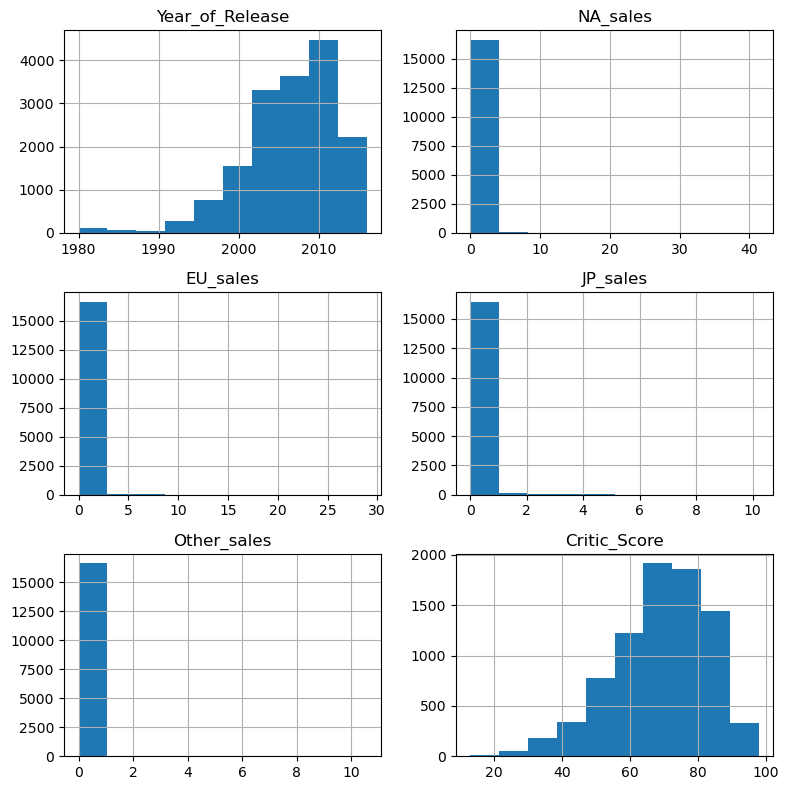

In [7]:
data.hist(figsize=(8, 8))
plt.tight_layout()

Первые выводы:

1. Игры активно начали выпускать после 2000 года
2. Оценки критиков в основном выше 60 баллов

Так же можно заметить явные выбросы на гистограммах с продажами.

Отсутствует гистограмма оценок пользователей из-за типа данных object.

Есть существенное количество пропусков в столбцах с годами релиза, рейтингом, оценками критиков и пользователей.

# Предобработка данных

## Переименование столбцов

In [8]:
#Сменим регистр у всех столбцов 
data.columns = data.columns.str.lower()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Обработка пропусков

### Название и жанр игры

In [10]:
data.query('name.isna() or genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Для данных строк практически все значения отсутсвуют, удалим их.

In [11]:
data.dropna(subset=['name'], inplace=True)

In [12]:
data['name'].isna().sum()

0

### Год релиза

In [13]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data['year_of_release'].isna().sum() / data['year_of_release'].shape[0]

0.016095255190570215

Данные о годах выпуска игр можно найти в свободном доступе и конечно есть желание заполнить ими пропущенные значения, но мне кажется это нерациональным, т.к. количество пропусков в данных равно 1.6%. Заполнение пропусков займёт много времени и несущественно повлияет на результат. *Удалим их*.

*Пропуски предположительно могли появиться* из-за того, что *столбец просто пропустили*, т.к. для некоторых игр год релиза указан в названии, например PDC World Championship Darts 2008. Так же возможно *на момент создания игры точный год релиза был неизвестен*.

In [15]:
data.dropna(subset=['year_of_release'], inplace=True)

In [16]:
data['year_of_release'].isna().sum()

0

### Оценка критиков, пользователей и рейтинг игры.

*Эти пропуски было решено оставить без изменений*, т.к. любое количественное значение сразу приведёт к искажению результатов. 

Текстовые заглушки для столбцов `critic_score` и `user_score` ставить нет необходимости, т.к. на следующих этапах эти столбцы будут преобразованы к типам float.

Для столбца `rating` поставим текстовую заглушку unknown.

In [17]:
data['rating'].fillna('unknown', inplace=True)

In [18]:
data['rating'].isna().sum()

0

## Обработка дубликатов

In [19]:
#Проверим явные дубликаты
data.duplicated().sum()

0

In [20]:
#Выведем уникальные значения
for item in ['genre', 'year_of_release', 'platform', 'rating', 'user_score', 'critic_score']:
    print(item, data[item].sort_values().unique(), len(data[item].sort_values().unique()), sep='\n', end='\n\n')

genre
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']
12

year_of_release
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.]
37

platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
31

rating
['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' 'unknown']
9

user_score
['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6

- **Жанр**:
Дубликатов по жанрам нет, не будем ничего менять.
- **Год релиза**:
Можно попробовать заменить тип столбца на datetime, но в целом значения выглядят хорошо и правдоподобно.
- **Платформа**: Неявные дубликаты отсутствуют.
- **Рейтинг**: В рейтинге есть неявные дубликаты. 
Рейтинги 'E' и 'K-A' это обозначения одного и того же рейтинга «E» («Everyone») — «Для всех», старое название "K-A" ("Kids to Adults"). *Заменим 'K-A' на 'E'*.
Аббревиатуры рейтингов общепринять и используются, заменять на полные названия не будем.
- **Оценки пользователей**: В данных присутствует значение 'tbd' - 'To Be Determined,', что переводится как 'Будет определено'. *Так как значение рейтинга не определено, заменим на NaN.* Возможно данные значения появляются, если добавить игру в лист ожидания.
- **Оценки критиков**: выглядят правдоподобно.


Т.к. мы хотим заменить 'K-A' на 'E' в рейтинге, проверим, есть ли в датафрейме возможные дубликаты.

In [21]:
data[(data['rating'] == 'K-A')]['name']

656          Theme Hospital
903      PaRappa The Rapper
16681               Worms 2
Name: name, dtype: object

In [22]:
data.loc[(data['rating'] == 'E') & ((data['name'] == 'Theme Hospital') | (data['name'] == 'Worms 2') | (data['name'] == 'PaRappa The Rapper'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9091,PaRappa The Rapper,PSP,2006.0,Misc,0.11,0.0,0.02,0.02,67.0,5.2,E


In [23]:
data[data['name'] == 'PaRappa The Rapper']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
9091,PaRappa The Rapper,PSP,2006.0,Misc,0.11,0.00,0.02,0.02,67.0,5.2,E


Одна и та же игра выпускалась для разных платформ, это не дубликат, может спокойно заменить рейтинг.

In [24]:
#Заменим 'K-A' на 'E' в рейтинге
data['rating'].replace('K-A', 'E', inplace=True)

In [25]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [26]:
#tbd заменим на NaN в оценках пользователя
data['user_score'].replace('tbd', np.nan, inplace=True)

In [27]:
(data['user_score'] == 'tbd').sum()

0

In [28]:
#Сбросим индексы после удаления пустых строк
data.reset_index(drop=True, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Суммарные продажи во всех регионах

In [30]:
#Добавим столбец с суммарными продажами во всех регионах
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Изменение типов данных

Изменим тип данных для столбцов `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`, `user_score`, `total_sales` на float32, чтобы сэкономить память.

In [31]:
try:
    data['user_score'] = data['user_score'].astype('float32')
    data['na_sales'] = data['na_sales'].astype('float32')
    data['eu_sales'] = data['eu_sales'].astype('float32')
    data['jp_sales'] = data['jp_sales'].astype('float32')
    data['other_sales'] = data['other_sales'].astype('float32')
    data['total_sales'] = data['total_sales'].astype('float32')
    data['critic_score'] = data['critic_score'].astype('float32')
    data['year_of_release'] = data['year_of_release'].astype('int32')
except:
    print(f'Возникла ошибка при при попытке сменить тип данных')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float32
dtypes: float32(7), int32(1), object(4)
memory usage: 1.0+ MB


### Обработка аномалий

Построим гистограммы для каждого столбца с продажами.

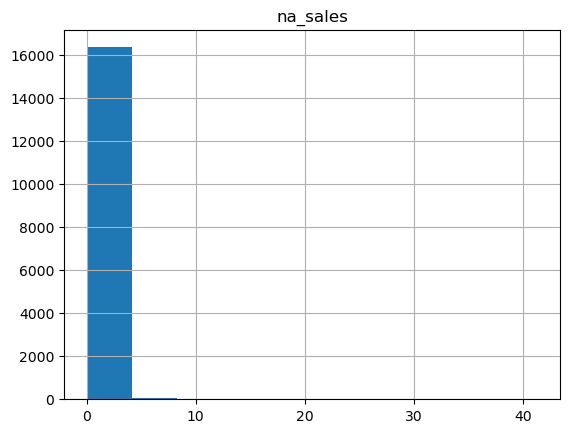

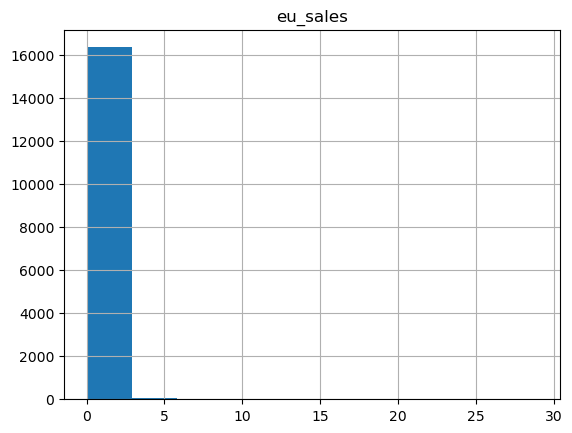

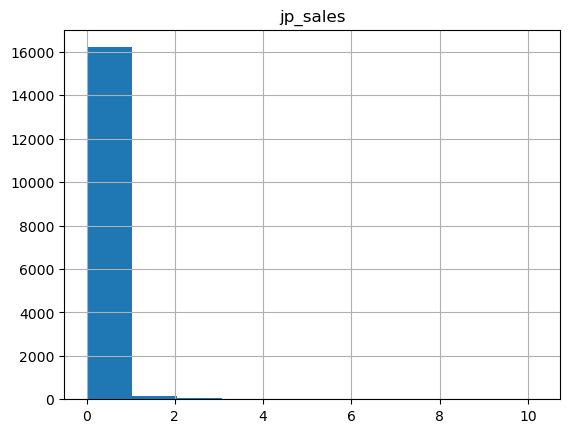

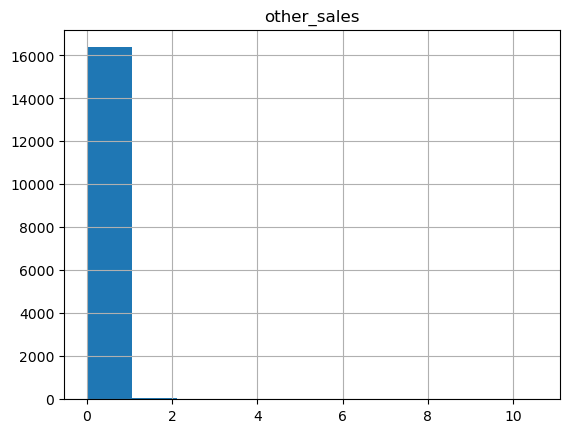

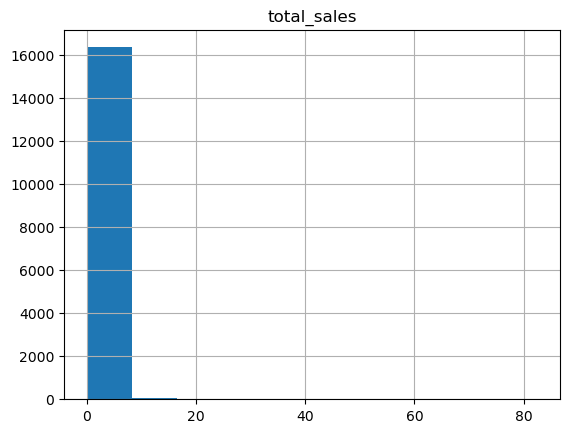

In [35]:
for item in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']:
    data.hist(item)
    plt.show()

Можно заметить выбросы в каждом столбце с продажами, их можно проанализировать на основе общих продажах при значениях выше 10.

In [36]:
data.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.540001
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,unknown,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,unknown,31.379999
...,...,...,...,...,...,...,...,...,...,...,...,...
57,Grand Theft Auto IV,PS3,2008,Action,4.760000,3.690000,0.44,1.61,98.0,7.5,M,10.500000
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.340000,2.650000,3.15,0.35,NaN,NaN,unknown,10.490000
59,Super Mario 64,DS,2004,Platform,5.010000,3.070000,1.25,0.97,NaN,NaN,unknown,10.300000
60,Call of Duty: Ghosts,X360,2013,Shooter,6.730000,2.560000,0.04,0.91,73.0,2.6,M,10.240000


Можно заметить, что игры с большим количеством продаж, которые на гистограммах выглядят как выбросы, это очень популярные игры. Не будем удалять их из датафрейма.

## Исследовательский анализ данных

### Анализ количества выпускаемых игр

In [37]:
# Посмотрим сколько игр выпускалось в разные годы
data.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

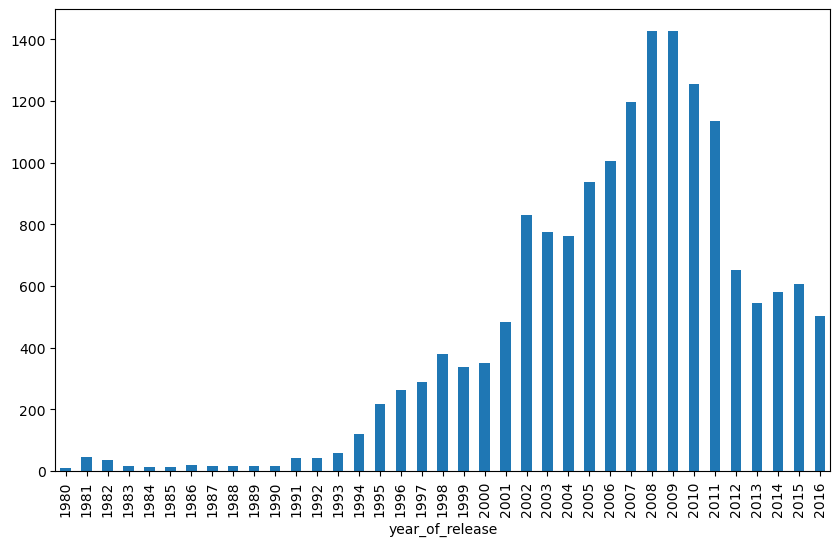

In [38]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(10, 6))
plt.show()

Можно условно разбить график на несколько периодов:
- 1980 - 1990: геймдев только начинает зарождаться, игры выпускаются стабильно, но совсем в небольших количествах, менее 50 штук за год
- 1991 - 2001: видим стабильный рост выпускаемых игр, до 500 игр за год.
- 2002: резкий скачок, выходит практически в 2 раза больше игр, чем в предыдущих год, 829
- 2003 - 2009: количество игр так же продолжает расти и мы можем наблюдать 2 пика в 2008 и 2009 годах, 1427 и 1426 игр за год
- 2009 - 2016: количество выпускаемых игр падает, и к 2016 практически оно практически равно показателям за 2001, 502 игры за год.

### Анализ платформ

In [39]:
data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)
#Для анализа возьмём первые 6 платформ, продажи остальных в несколько раз меньше.

platform
PS2     1233.560059
X360     961.239990
PS3      931.340027
Wii      891.179993
DS       802.779968
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
PC       255.759995
GB       254.429993
XB       251.569992
NES      251.050003
N64      218.009995
SNES     200.040009
GC       196.729996
XOne     159.319992
2600      86.480003
WiiU      82.190002
PSV       53.810001
SAT       33.590000
GEN       28.350000
DC        15.950000
SCD        1.860000
NG         1.440000
WS         1.420000
TG16       0.160000
3DO        0.100000
GG         0.040000
PCFX       0.030000
Name: total_sales, dtype: float32

6 самых популярных платформ:
- Sony PlayStation 2 (PS2)
- Xbox 360 (X360)
- Sony PlayStation 3 (PS3)
- Nintendo Wii (Wii)
- Nintendo DS (DS)
- PlayStation (PS)

In [83]:
#Создадим переменную с самыми прибыльными платформами
profit_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

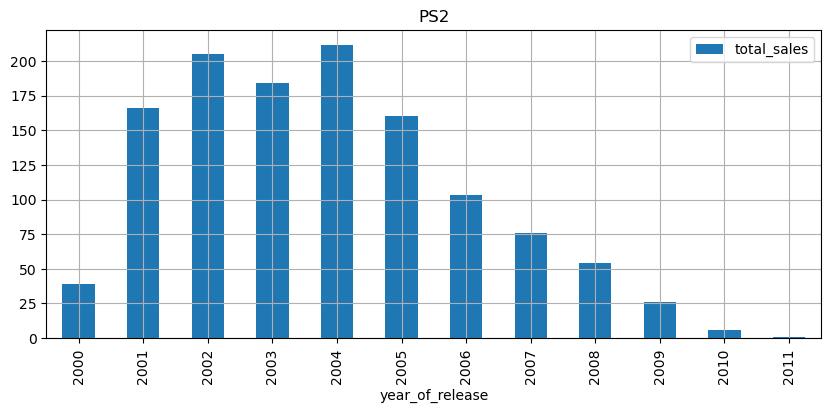

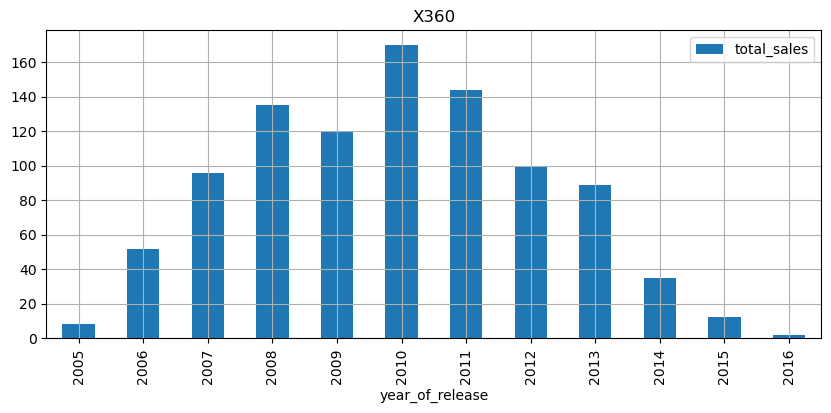

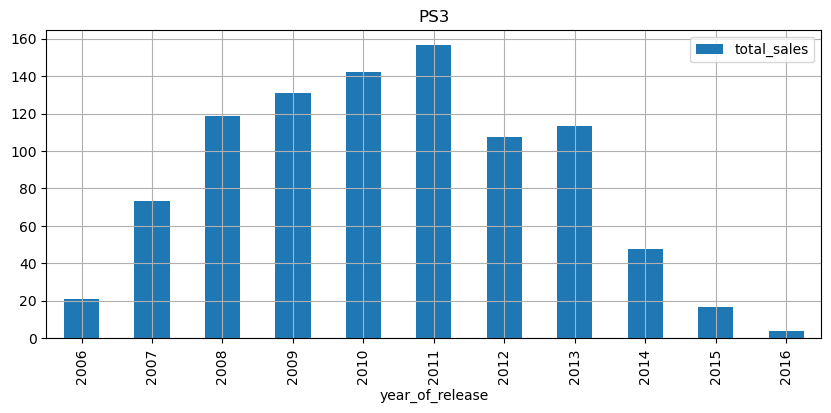

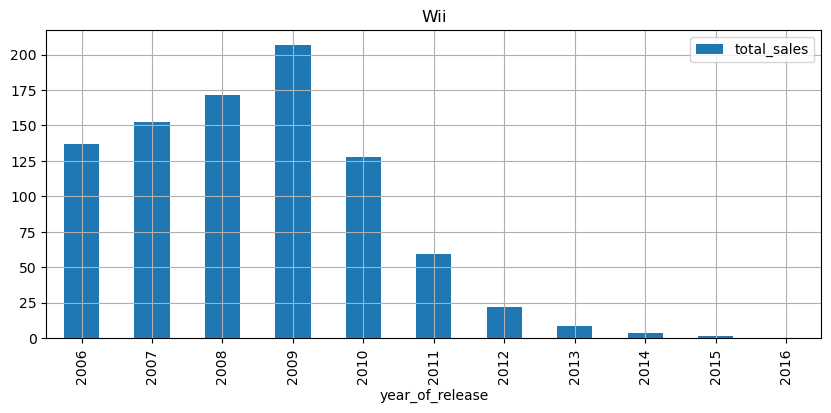

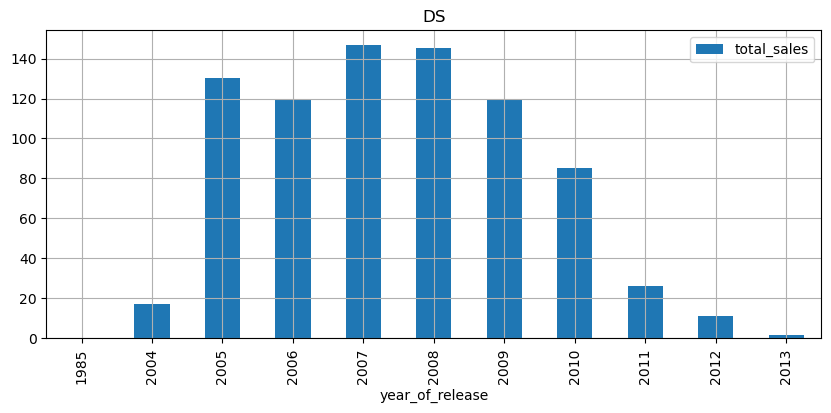

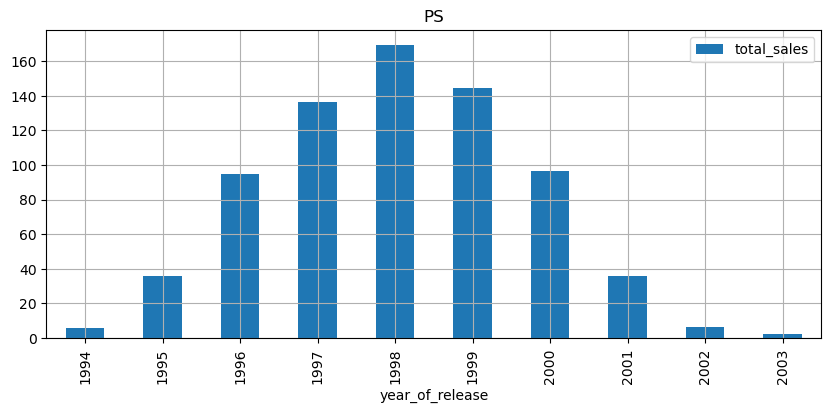

In [40]:
#Построим графики общих продаж для популярных платформ
for item in profit_platforms:
    data[data['platform'] == item]\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', grid=True, figsize=(10,4))
    plt.title(item)

Найдём среднее время жизни платформ

In [41]:
mean_years = 0
for item in profit_platforms:
    years = data[data['platform'] == item]['year_of_release'].max() - data[data['platform'] == item]['year_of_release'].min()
    mean_years += years
    
print(f'Среднее время жизни платформ: {mean_years / 6 :.1f}')

Среднее время жизни платформ: 13.17


Даже на примере выборки из 6 платформ, можно увидеть как одно поколение консолей сменяет другое.

В основном все прибыльные платформы были выпущены после 2000 года, посмотрим как обстояли дела с суммарным доходом платформ с 1980 по 2000 года.

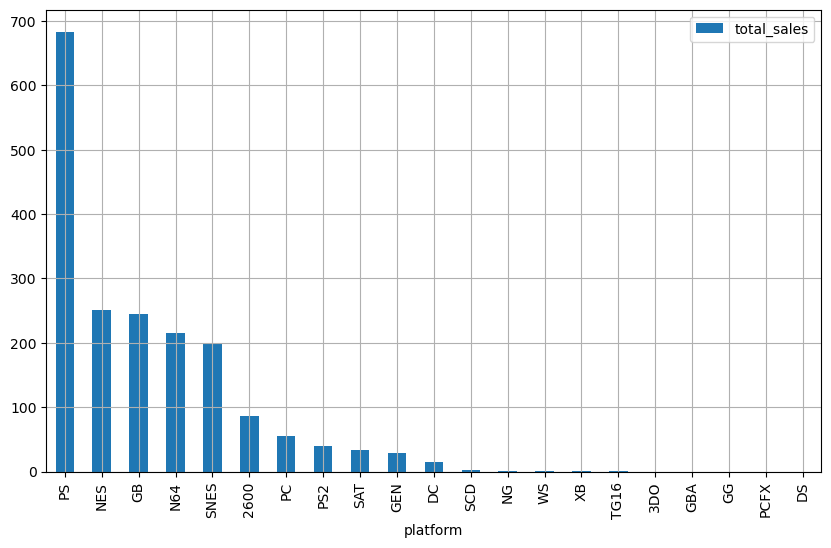

In [42]:
data.query('year_of_release <= 2000')\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(10,6))
plt.show()

5 самых популярных платформ с 1980 по 2000 года:
- PlayStation (PS)
- Nintendo Entertainment System (NES)
- Nintendo 64 (N64)
- Super Nintendo Entertainment System (SNES)
- Game Boy (GB)

Построим для них графики.

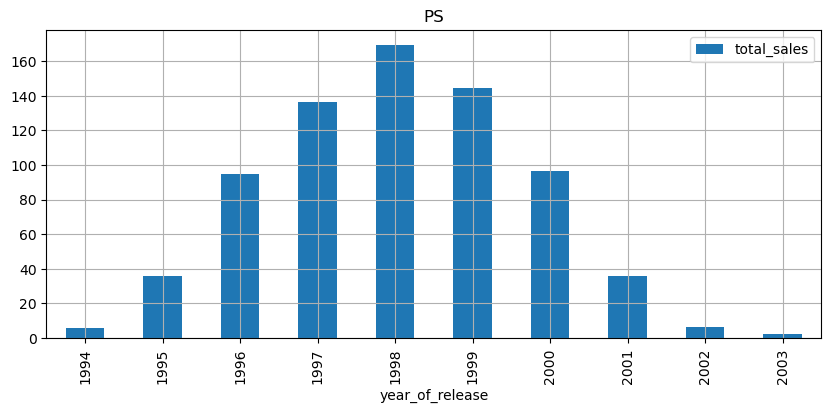

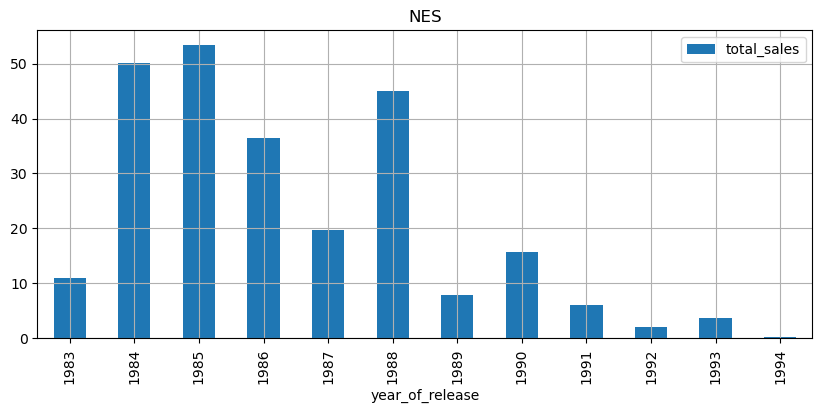

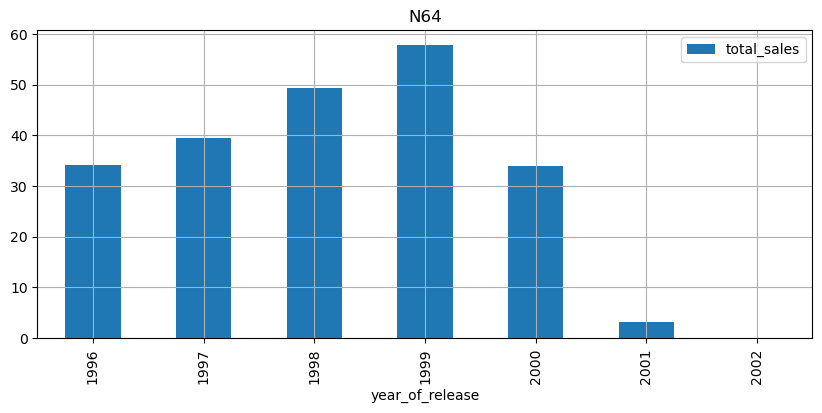

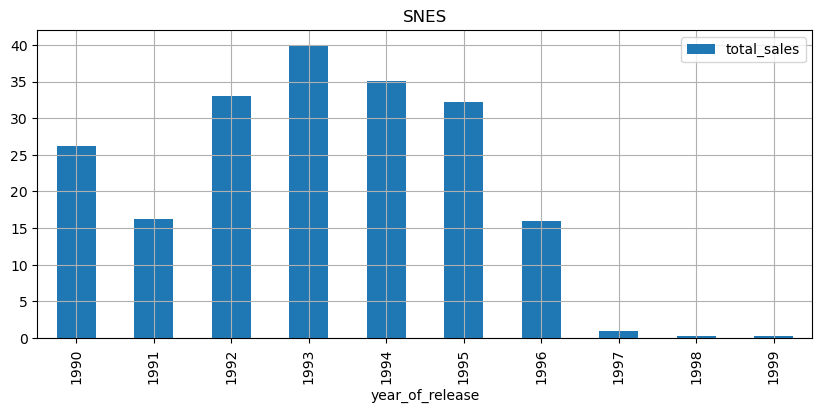

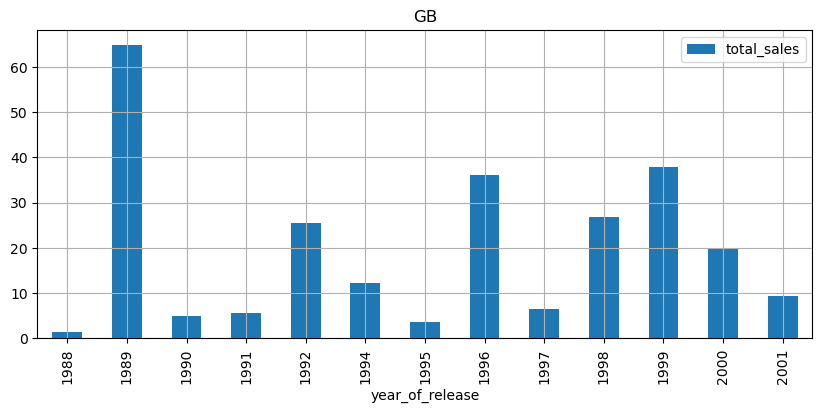

In [43]:
for item in ['PS', 'NES', 'N64', 'SNES', 'GB']:
    data[data['platform'] == item]\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', grid=True, figsize=(10,4))
    plt.title(item)

In [44]:
mean_years = 0
for item in ['PS', 'NES', 'N64', 'SNES', 'GB']:
    years = data[data['platform'] == item]['year_of_release'].max() - data[data['platform'] == item]['year_of_release'].min()
    mean_years += years
    
print(f'Среднее время жизни платформ: {mean_years / 6 :.1f}')

Среднее время жизни платформ: 8.00


Выведем платформы, которые дожили до 2016 года

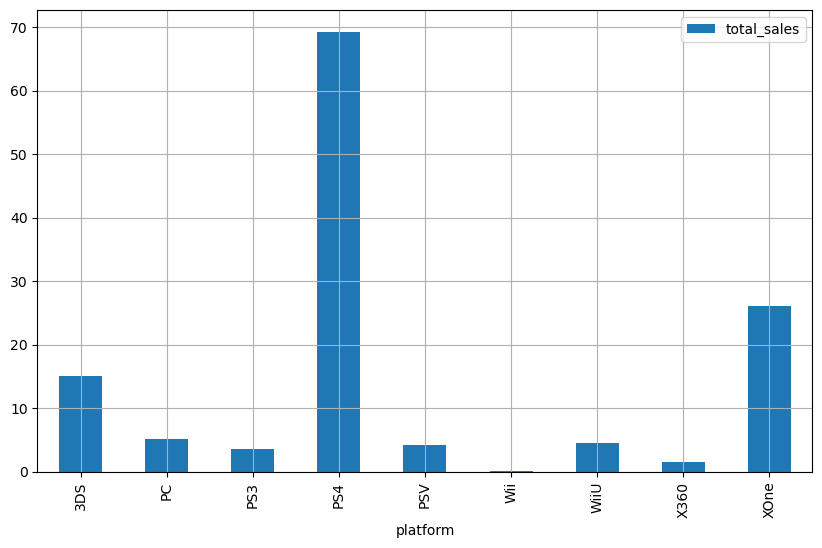

In [45]:
data.query('year_of_release >= 2016')\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.plot(kind='bar', grid=True, figsize=(10,6))
plt.show()

**Вывод:**

Можно заметить, что время жизни платформ после 2000 года увеличилось практически в 2 раза, с 8 до 13 лет. 

Несомненным **лидером по продажам является компания Sony и их консоль PlayStation**, причём разные модели лидируют по продажам в разные периоды и сменяют друг друга.

**На втором месте по суммарным продажам консоль компании Microsoft Xbox 360**, но в 2016 Xbox One обогнала по продажам предыдущее поколение консоли.

**Далее Nintendo Wii**, но на графике за 2016 год можно заметить, что Wii U обогнала по продажам предыдущее поколении консоли.

**Nintendo DS**, которая пришла на замену GameBoy, **не дожила до 2016 года**, её на смену пришла консоль нового поколения Nintendo 3DS.

### Выбор актуального периода

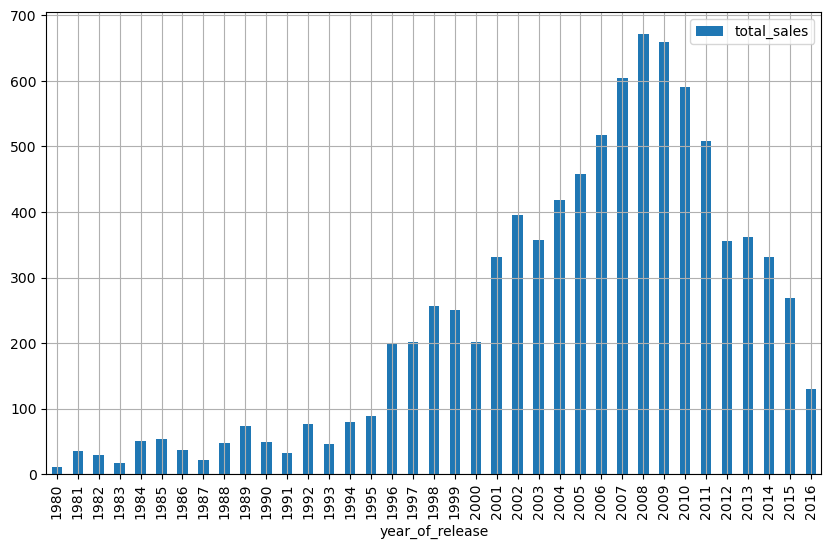

In [46]:
#построим график общах продаж по годам
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', grid=True, figsize=(10,6))
plt.show()

**Для анализа возьмём актуальный период**, как последние несколько лет, **с 2014 по 2016**, данные стабилизировались после резких скачков и падений и наиболее актульно отображают рынок платформ и игр, не будем учитывать брать более ранние года, т.к. далеко не все платформы дожили до этого времени.

In [47]:
data_actual = data.query('year_of_release >= 2014 and total_sales != 0')
data_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160260,0.055115,0.048325,72.306404,6.623532,0.431887
std,0.799624,0.446137,0.466851,0.211513,0.141789,12.213502,1.589791,1.056111
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


### Потенциально прибыльные платформы

In [48]:
data_actual['platform'].sort_values().unique()

array(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne'], dtype=object)

In [49]:
data[data['year_of_release'] == 2016]['platform'].sort_values().unique()

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
      dtype=object)

До 2016 года дожили только такие платформы, как PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.

Но в нашем актуальном датасете так же есть платформа PSP, удалим её.

In [50]:
data_actual = data_actual.query('platform != "PSP"')

In [51]:
data_actual['platform'].sort_values().unique()

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
      dtype=object)

Построим графики суммарных продаж для каждой из них и посмотрим для каких платформ продажи растут и падают. Из них и выберем потенциально прибыльные плафтормы.

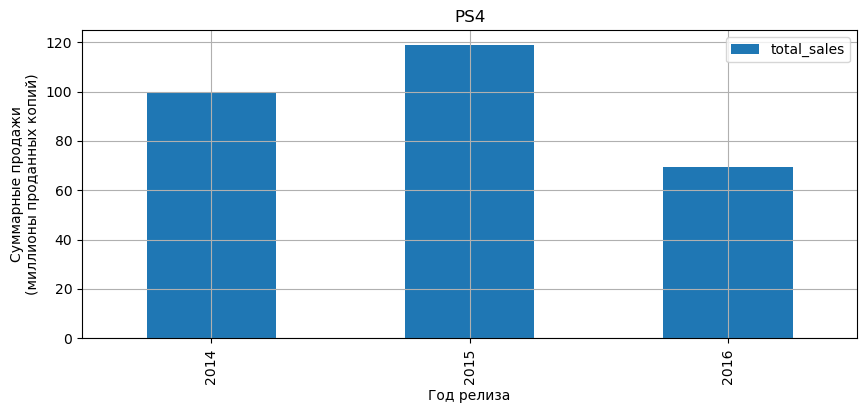

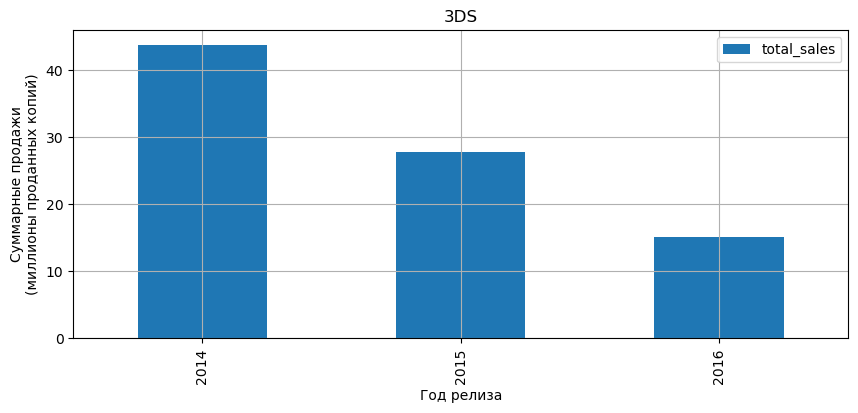

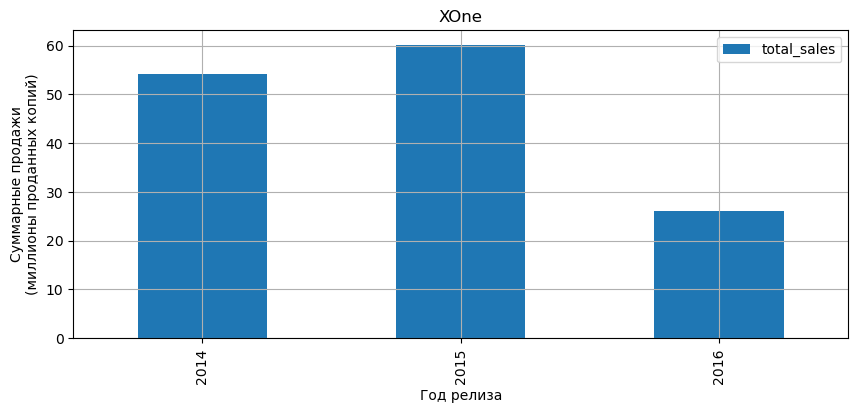

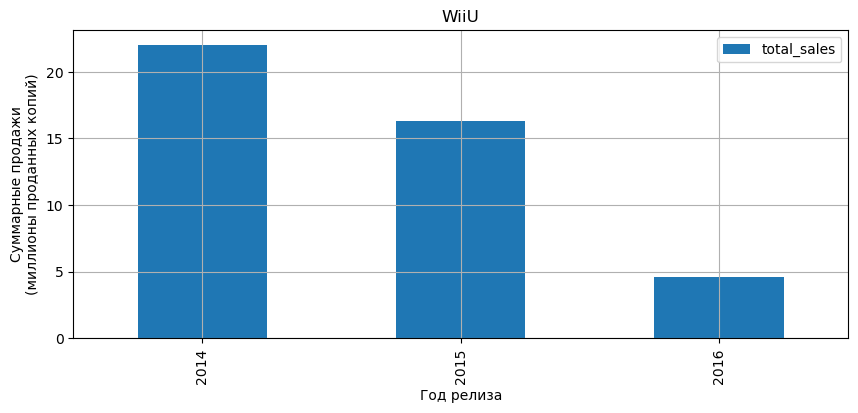

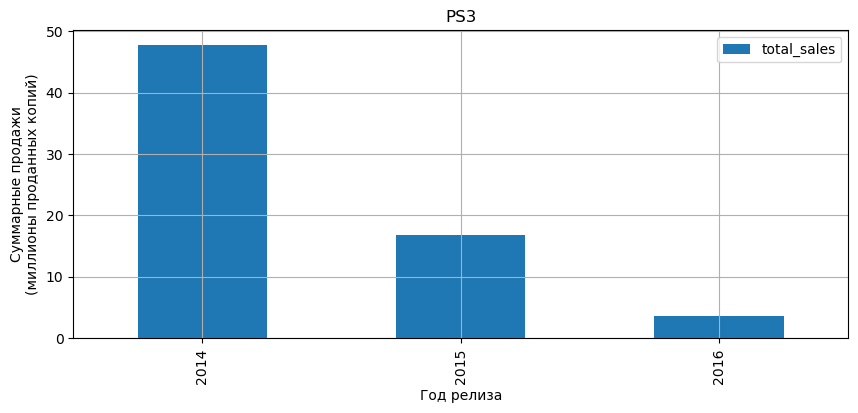

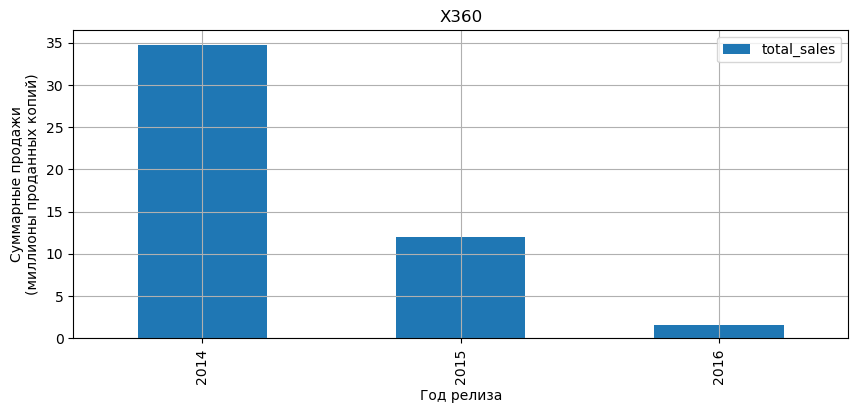

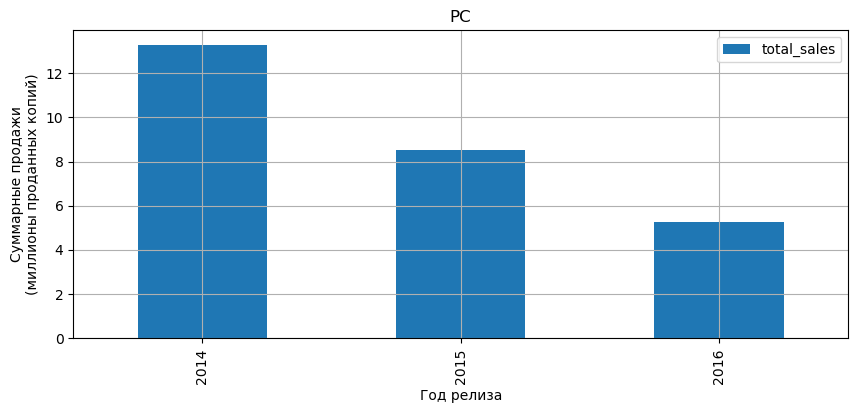

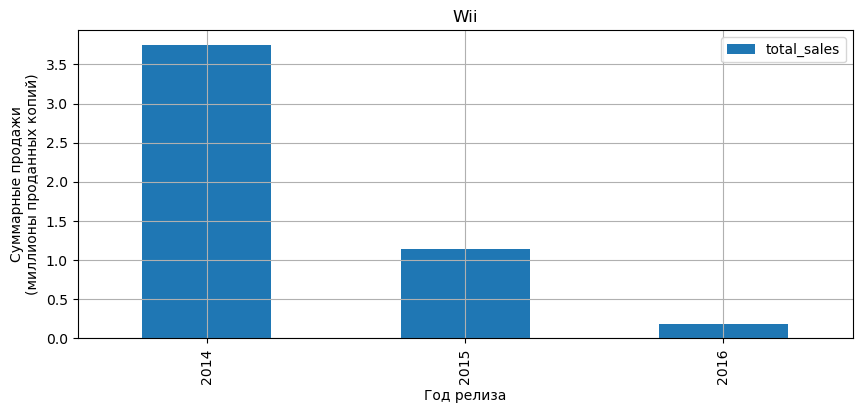

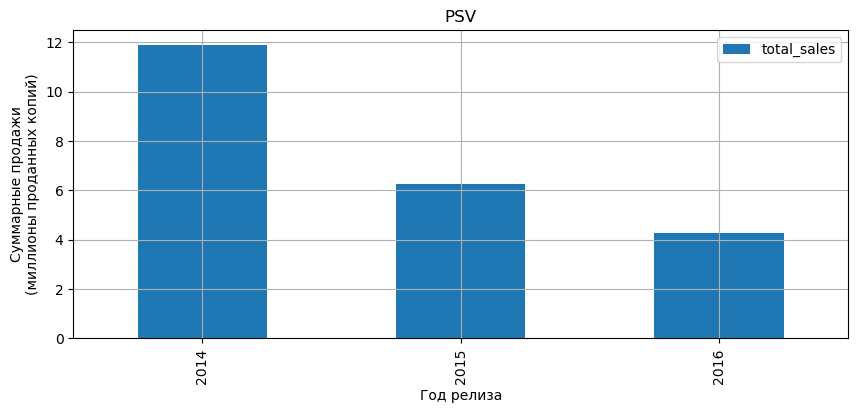

In [52]:
for item in data_actual['platform'].unique():
    data_actual[data_actual['platform'] == item]\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', grid=True, figsize=(10,4))
    plt.title(item)
    plt.xlabel('Год релиза')
    plt.ylabel('Суммарные продажи\n(миллионы проданных копий)')

**Вывод:**

2016 год для всех платформ был не очень удачный, если верить тому, что датасет содержит все актуальные данные, но проверить это не представляется возможным.

Учитывая продажи в предыдущие год, из графиков можно сделать вывод, что **потенциально прибыльные платформы**:
- Sony PlayStation 4 (PS4)
- Xbox One (XOne)

Доходы остальных платформ стабильно падают.

### Диаграмма размаха для глобальных продаж

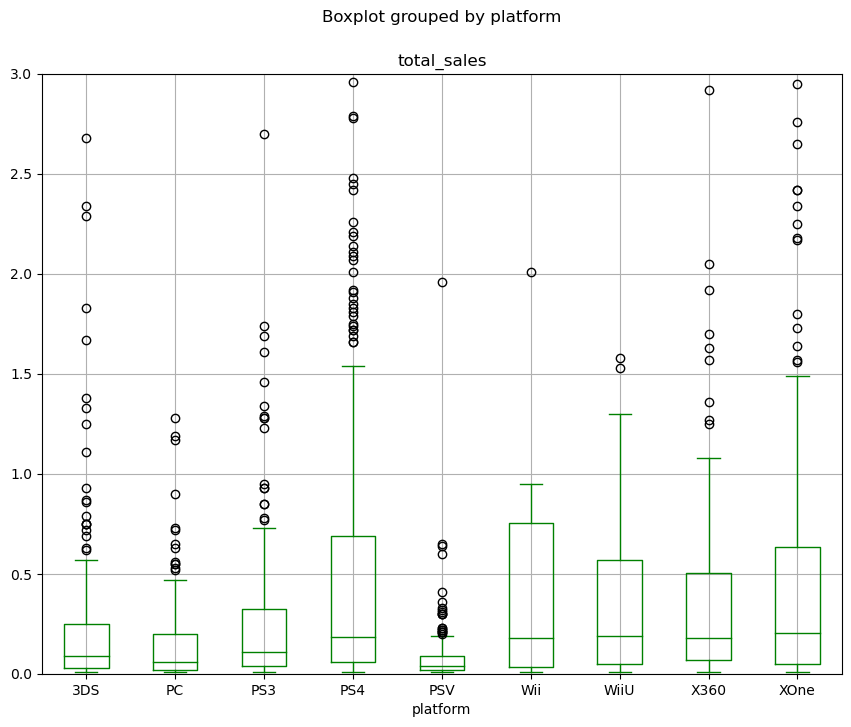

In [53]:
data_actual.boxplot(column='total_sales', by='platform', color='green', figsize=(10, 8)).set(ylim=(0,3))
plt.show()

**Вывод:** 

На диаграмме размаха можно заметить высокие значения общих продаж у таких платформ, как:
- Wii
- DS
- X360
- PS3
- PS2
- WiiU

Но такие высокие продажи это единичные случаи, медианное значение продаж для этих платформ гораздо ниже.

*Лучше всего себя показывают платформы*:
- PS4
- XOne 

Медианные значения и размах этих платформ находятся на гораздо более высоком уровне, чем у остальных, это говорит о том, что *продажи для этих платформ стабильно выше*.

### Корреляция между отзывами и продажами

Посчитаем корреляция между отзывами критиков и пользователей и глобальными продажами для платформы PS4, т.к. у этой платформы самые высокие глобальные продажи.

In [54]:
corr_ps4 = data_actual[data_actual['platform'] == 'PS4']
corr_ps4.pivot_table(index='platform', values=['critic_score', 'user_score', 'total_sales'], aggfunc='corr')

critic_score  total_sales  user_score
platform                                                    
PS4      critic_score      1.000000     0.402661    0.546434
         user_score        0.546434    -0.040132    1.000000
         total_sales       0.402661     1.000000   -0.040132

Так же построим диаграмму рассеяния.

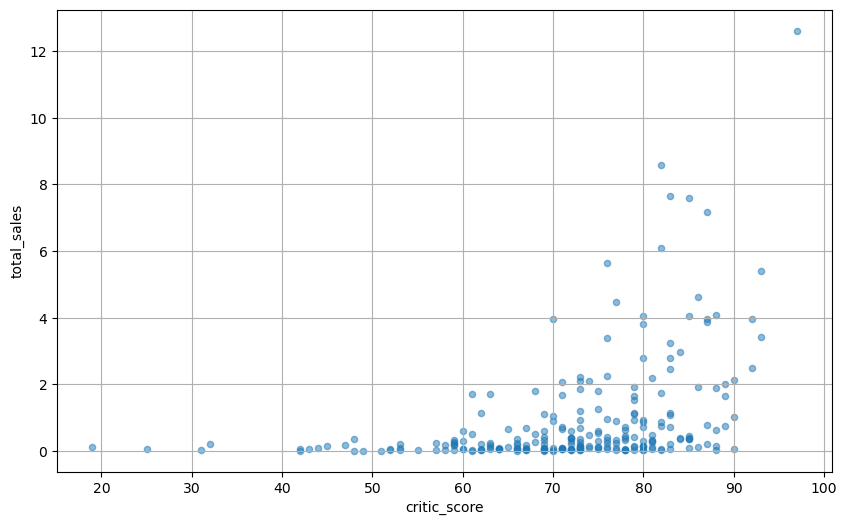

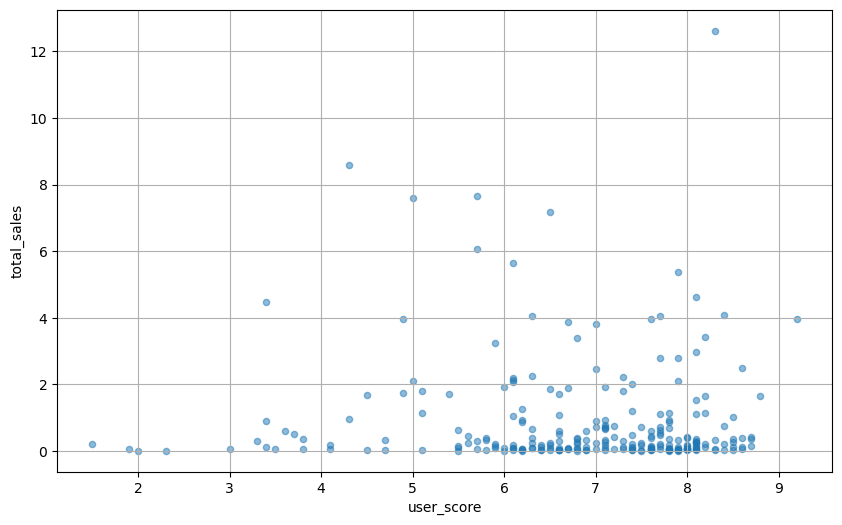

In [55]:
for item in ['critic_score', 'user_score']:
    corr_ps4.plot(x=item, y='total_sales', kind='scatter', figsize=(10, 6), alpha=0.5, grid=True)

<AxesSubplot:xlabel='year_of_release'>

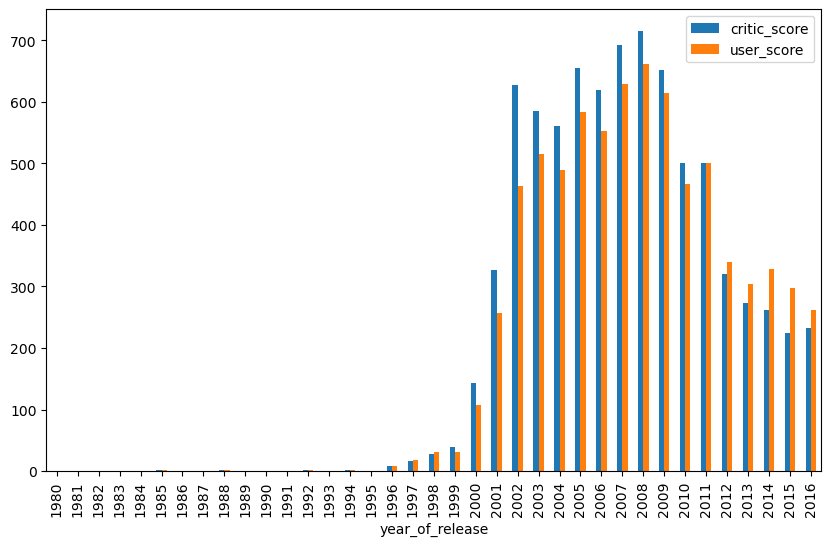

In [56]:
data.groupby('year_of_release')['critic_score', 'user_score'].count().plot(kind='bar', figsize=(10, 6))

**Вывод:**

Корреляция глобальных продаж и отзывов критиков слабо положительная и составляет 0.402661.

Корреляция глобальных продаж и отзывов пользователей слабо отрицательная и составляет -0.040132.

Из диаграммы рассеяния можно заметить, что *чем выше оценка критика, тем выше продажи*, если критики не предвзяты, или же утверждение может быть обратным, если критики не совсем чисты в своих намерениях)

Из диаграммы рассеяния оценки пользователей, можно заметить, что даже игры с низкими оценками имеют высокие продажи.

До 2011 года игры чаще оценивались критиками, после уже пользователи чаще оценивают игры, но тенденция к оцениванию в целом идёт на спад.

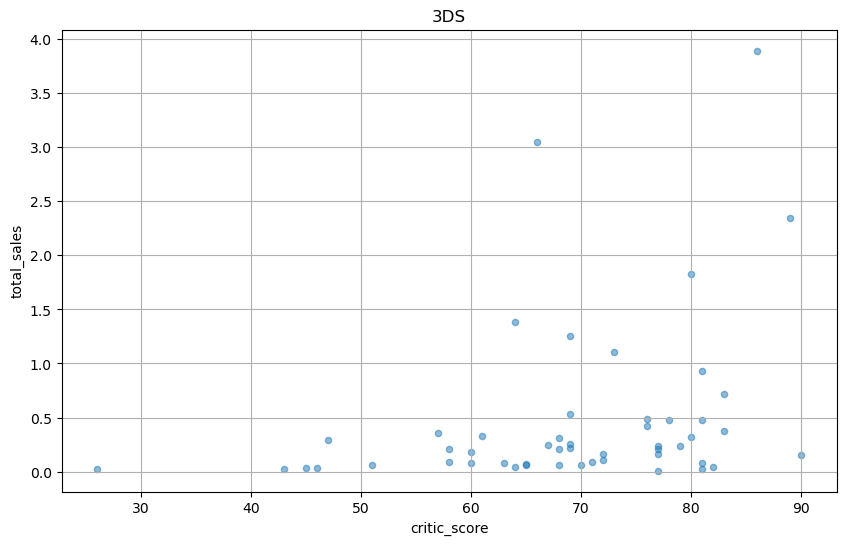

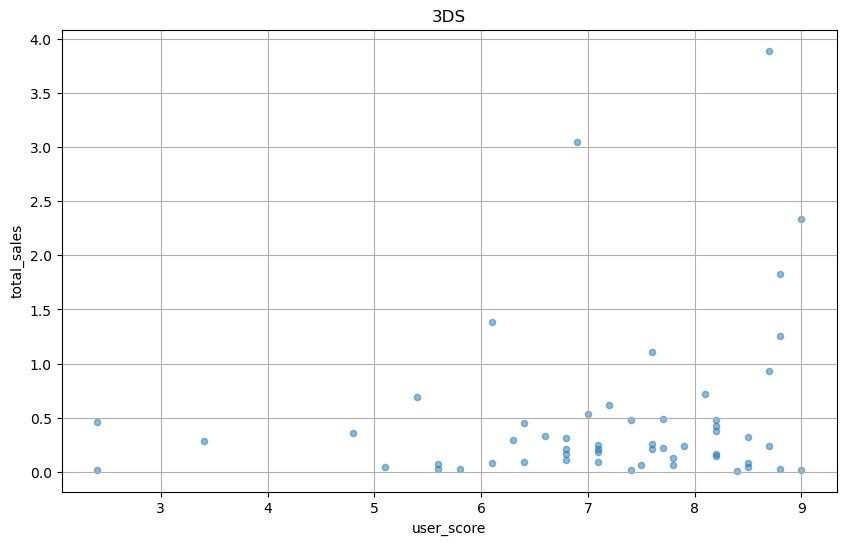

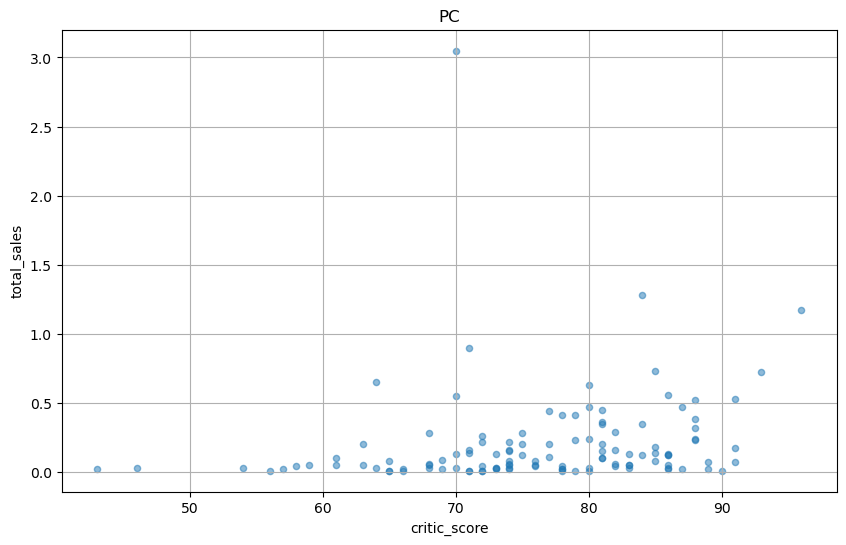

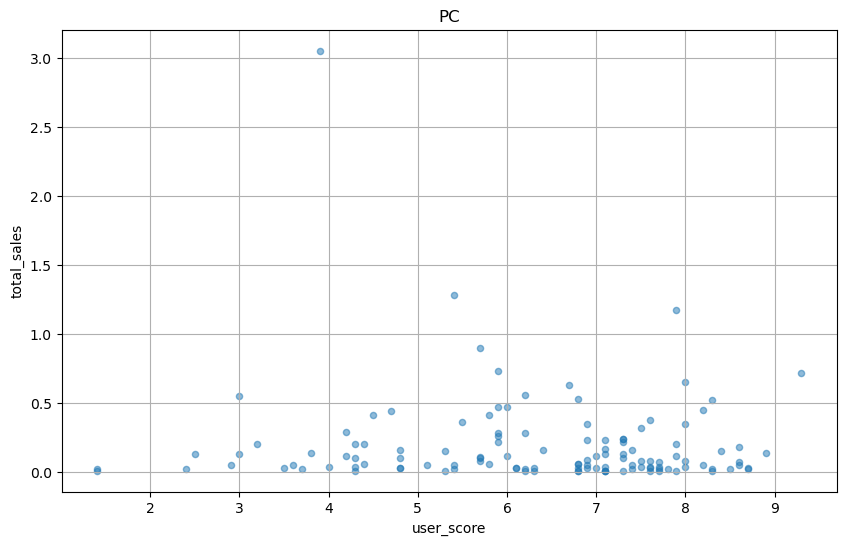

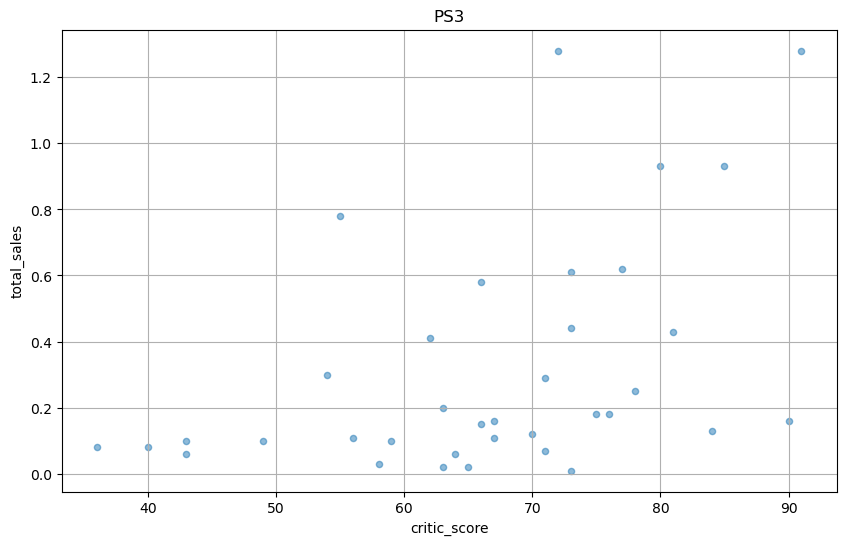

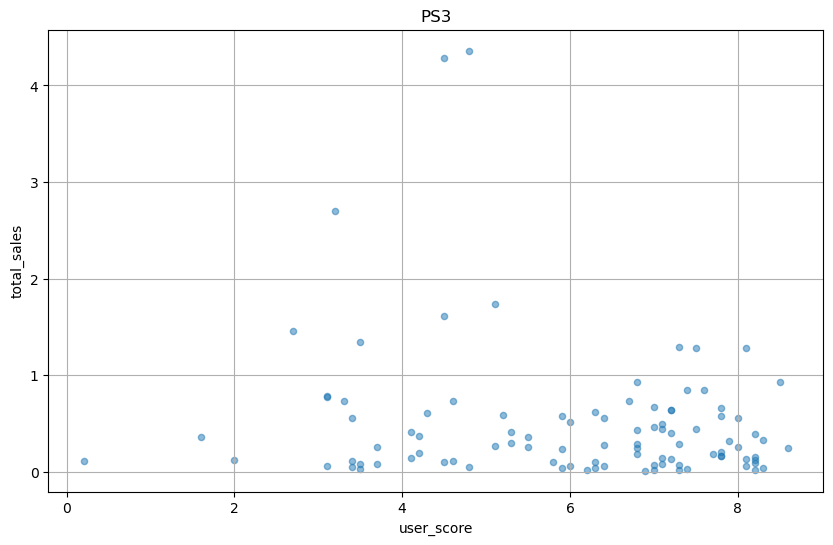

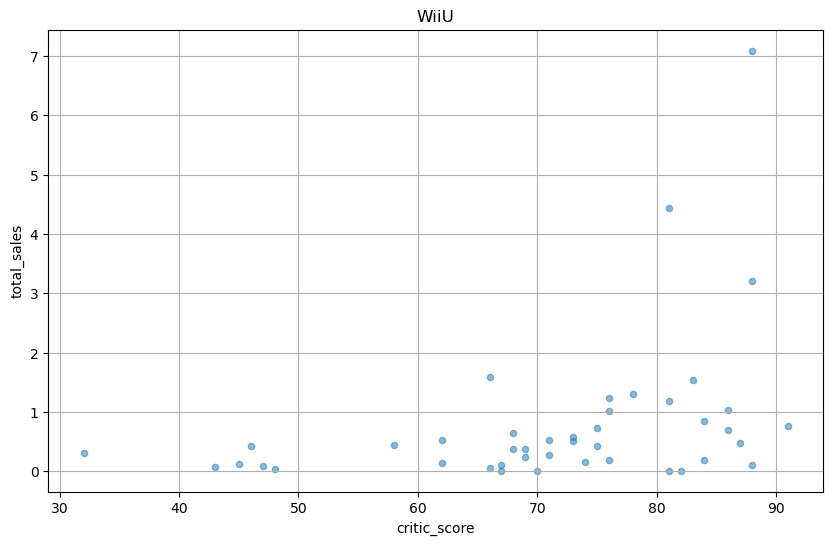

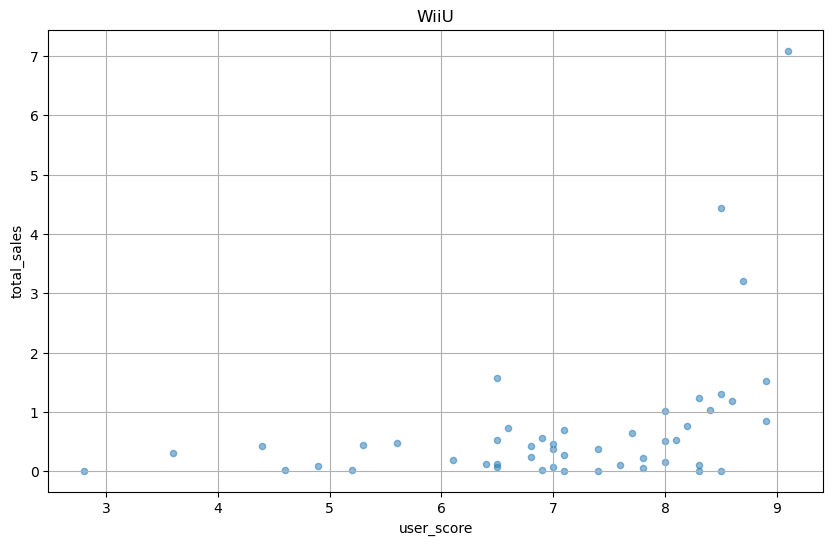

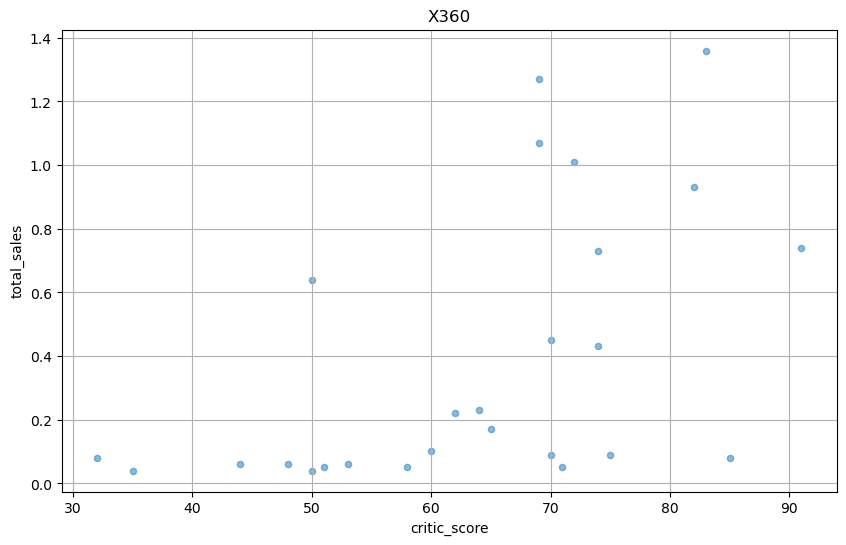

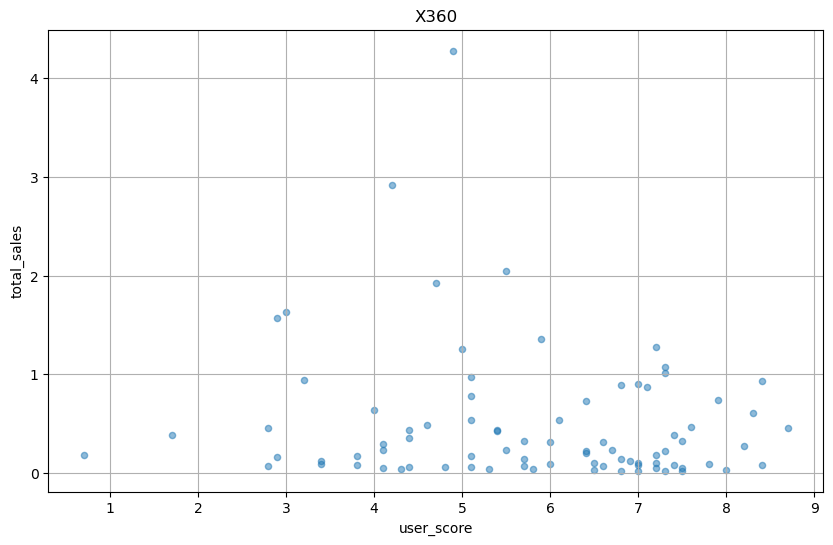

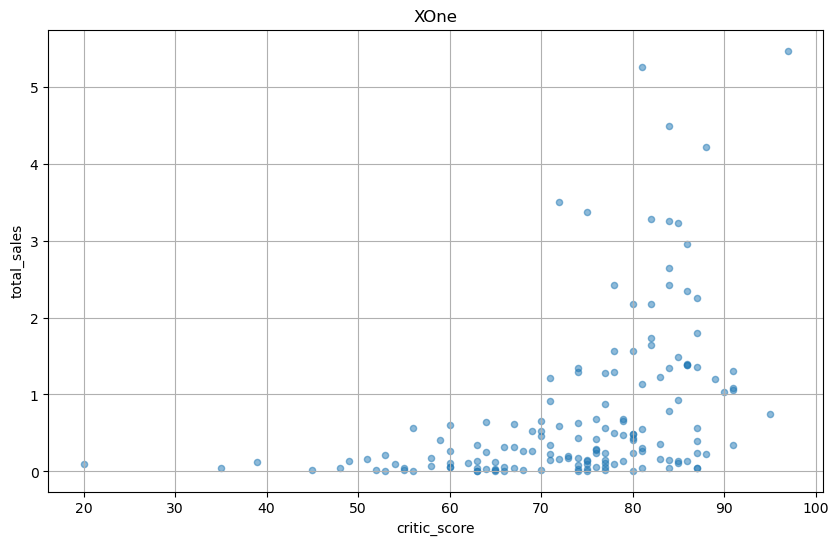

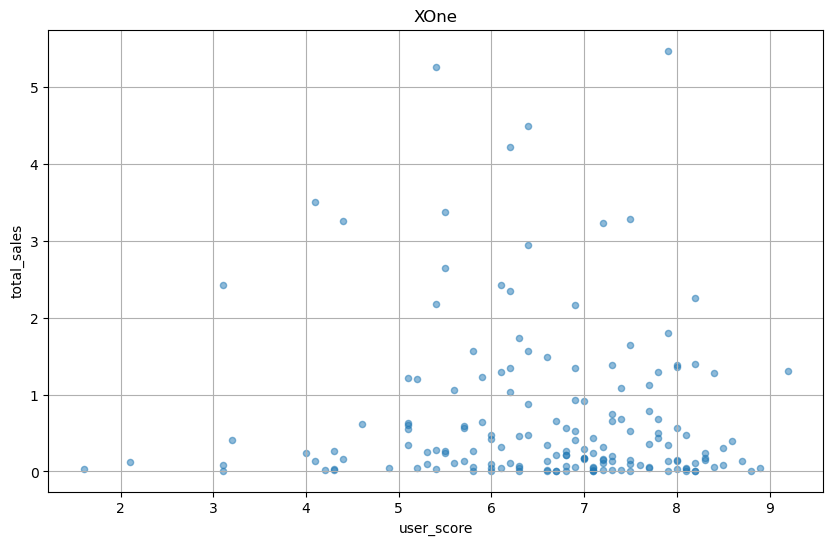

In [57]:
for platform in ['3DS', 'PC', 'PS3', 'WiiU', 'X360', 'XOne']:
    for item in ['critic_score', 'user_score']:
        data_actual[data_actual['platform'] == platform].plot(x=item,\
                                                              y='total_sales',\
                                                              kind='scatter',\
                                                              figsize=(10, 6),\
                                                              alpha=0.5,\
                                                              grid=True,\
                                                              title=platform)

In [58]:
data_actual.pivot_table(index='platform', values=['critic_score', 'user_score', 'total_sales'], aggfunc='corr')

critic_score  total_sales  user_score
platform                                                    
3DS      critic_score      1.000000     0.314117    0.862485
         user_score        0.862485     0.215193    1.000000
         total_sales       0.314117     1.000000    0.215193
PC       critic_score      1.000000     0.174634    0.466099
         user_score        0.466099    -0.071597    1.000000
         total_sales       0.174634     1.000000   -0.071597
PS3      critic_score      1.000000     0.446575    0.693445
         user_score        0.693445    -0.166761    1.000000
         total_sales       0.446575     1.000000   -0.166761
PS4      critic_score      1.000000     0.402661    0.546434
         user_score        0.546434    -0.040132    1.000000
         total_sales       0.402661     1.000000   -0.040132
PSV      critic_score      1.000000     0.042665    0.524066
         user_score        0.524066    -0.168455    1.000000
         total_sales       0.042665     1.000000   -0.168455
Wii      user_score             NaN     1.000000    1.000000
         total_sales            NaN     1.000000    1.000000
WiiU     critic_score      1.000000     0.370201    0.763536
         user_score        0.763536     0.407926    1.000000
         total_sales       0.370201     1.000000    0.407926
X360     critic_score      1.000000     0.525723    0.625309
         user_score        0.625309    -0.138445    1.000000
         total_sales       0.525723     1.000000   -0.138445
XOne     critic_score      1.000000     0.428677    0.440977
         user_score        0.440977    -0.070384    1.000000
         total_sales       0.428677     1.000000   -0.070384

**Вывод:**

Для остальных платформ вывод схож с выводом для популярной платформы PS4.

Лишь для двух платформ, 3DS и WiiU, корреляция оценки пользователей была слабо положительная, но имело значение близкое к 0, из этого можно сделать вывод, **что oценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет.**

### Распределение прибыли по жанрам

Посмотрим на игровые жанры с самыми низкими и самыми высокими продажами.

При обработке аномалий мы не избавлялись от выбросов, поэтому для оценки будем использовать медианные значения глобальных продаж, т.к. на них не повлияют продажи очень популярных игр и мы увидем реальный результат продаж по жанрам.

<AxesSubplot:xlabel='genre', ylabel='Глобальные продажи (млн)'>

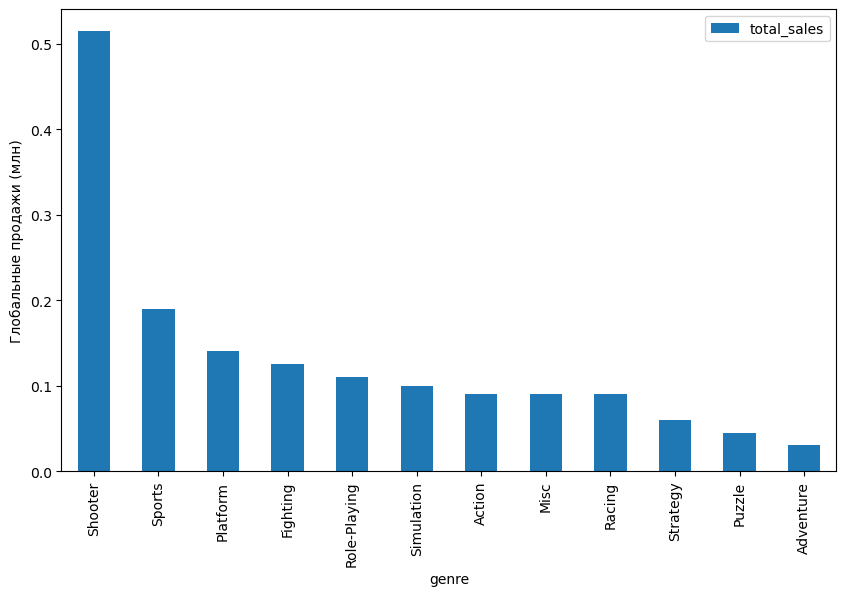

In [59]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', ylabel='Глобальные продажи (млн)', figsize=(10, 6))

<AxesSubplot:xlabel='genre,year_of_release', ylabel='Глобальные продажи (млн)'>

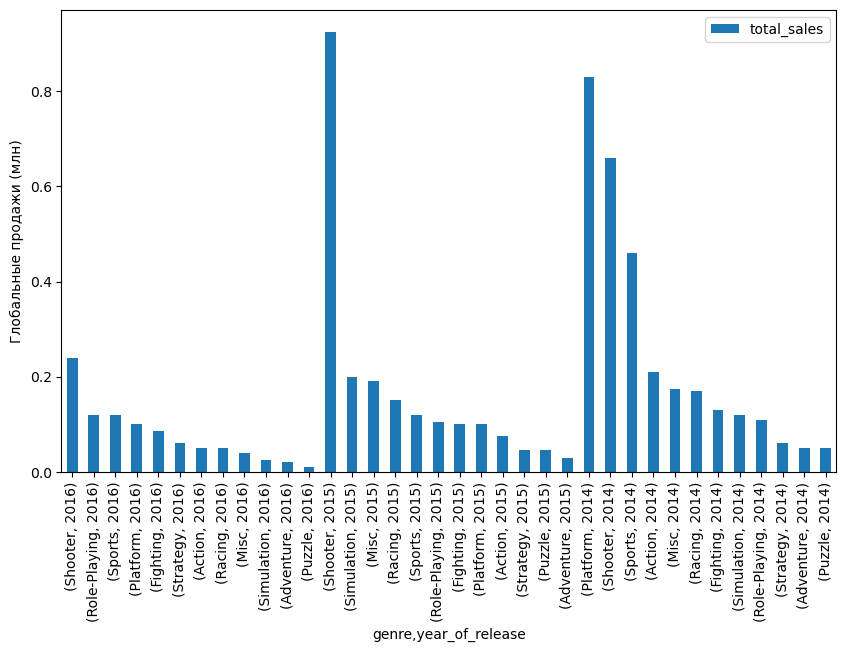

In [60]:
data_actual.pivot_table(index=['genre', 'year_of_release'], values='total_sales', aggfunc='median')\
.sort_values(by=['year_of_release', 'total_sales'], ascending=False)\
.plot(kind='bar', ylabel='Глобальные продажи (млн)', figsize=(10, 6))

<AxesSubplot:xlabel='genre', ylabel='Количество выпускаемых игр'>

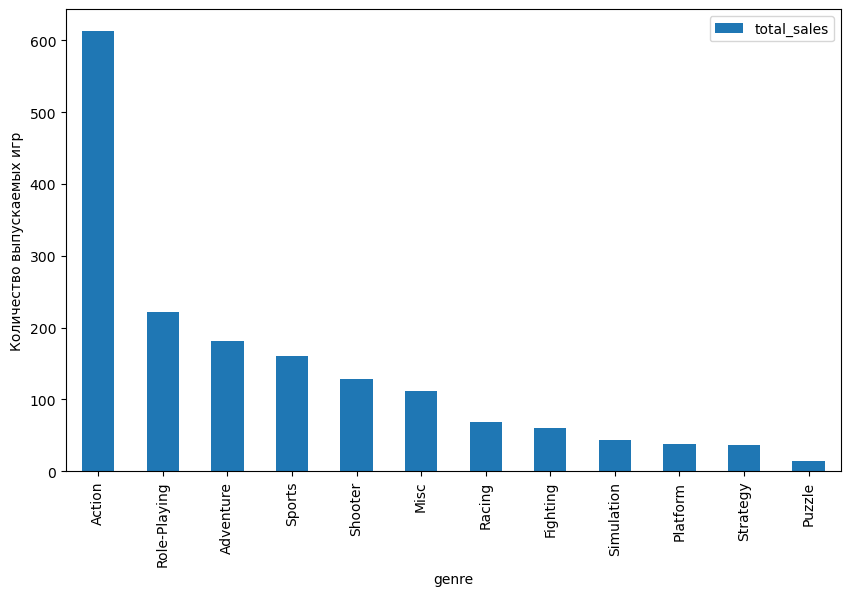

In [61]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='count')\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', ylabel='Количество выпускаемых игр', figsize=(10, 6))

<AxesSubplot:xlabel='genre,year_of_release', ylabel='Количество выпускаемых игр'>

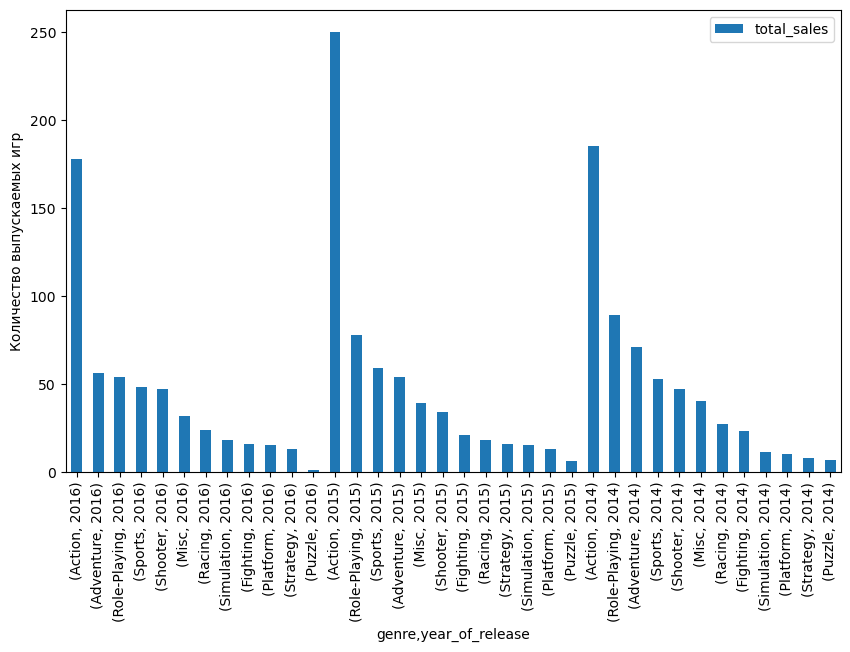

In [62]:
data_actual.pivot_table(index=['genre', 'year_of_release'], values='total_sales', aggfunc='count')\
.sort_values(by=['year_of_release', 'total_sales'], ascending=False)\
.plot(kind='bar', ylabel='Количество выпускаемых игр', figsize=(10, 6))

**Вывод:**

**Абсолютным лидером по глобальным продажам является жанр Shooter**, это неудивительно, учитывая какие крупные проекты выходили в эти годы: Call of Duty, Star Wars Battlefront, Destiny, Battlefield, Far Cry 4, Uncharted 4, Halo 5

*Топ-3 не популярных жанра по глобальным продажам*:
- Puzzle
- Strategy
- Adventure

**Абсолютным лидером по количеству выпускаемых игр является жанр Action.** (613 игр за 3 года)

*Топ-3 не популярных жанра по количеству продаж*:
- Platform
- Strategy
- Puzzle

Так же было интересно посмотреть, как за эти три года менялись тенденции игрового рынка по жанрам:

*В 2014 году по глобальным продажам лидировал Platform, а вот в 2015-16 годах Shooter*

*За все три года абсолютным лидером по количеству выпускаемых игр является жанр Action.*

## Портрет пользователя каждого региона

<AxesSubplot:ylabel='Доля продаж по странам от глобальных продаж'>

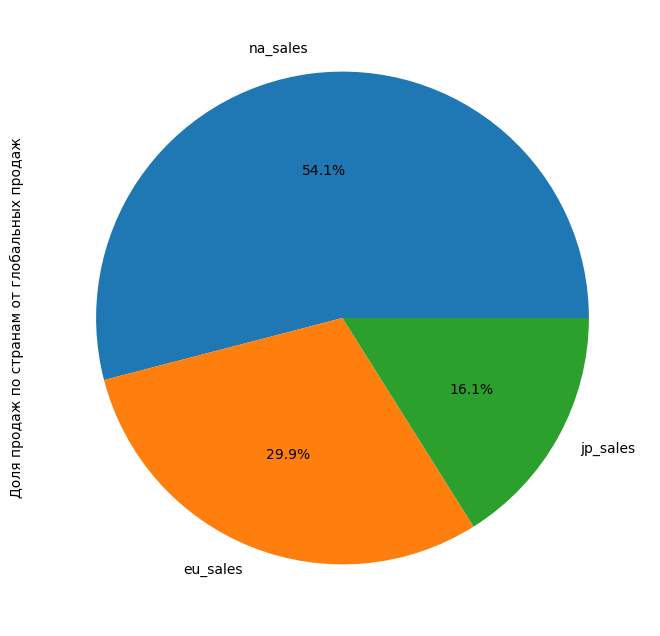

In [63]:
country_part_of_total_sale = data[['na_sales', 'eu_sales', 'jp_sales']].sum() / np.sum(data['total_sales']) * 100
country_part_of_total_sale.plot(kind='pie',\
                                  figsize=(8, 8),\
                                  ylabel='Доля продаж по странам от глобальных продаж',\
                                  autopct='%1.1f%%')

Напишем функцию, которая будут составлять портрет пользователя для каждого региона.

Задачи:

- Найти самые популярные платформы (топ-5), посмотреть различия в долях продаж.
- Найти самые популярные жанры (топ-5).
- Проверить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [84]:
def user_portrait(country_sales):
         
    #Самые популярные платформы
    top_platform = data_actual.pivot_table(index='platform', values=country_sales, aggfunc='sum')\
    .sort_values(by=[country_sales], ascending=False)\
    .head()

    data_actual['name_platform'] = data_actual['platform'].where(data_actual['platform'].isin(top_platform.index), 'Другие')

    platform = data_actual.pivot_table(index='name_platform', values=country_sales, aggfunc='sum')\
    .sort_values(by=[country_sales], ascending=False)
    
    pie_platforms = platform.plot(y=country_sales,\
                                  kind='pie',\
                                  figsize=(8, 8),\
                                  ylabel='Доля продаж популярных платформ',\
                                  autopct='%1.1f%%')

    #Самые популярные жанры
    top_genre = data_actual.pivot_table(index='genre', values=country_sales, aggfunc='sum')\
    .sort_values(by=[country_sales], ascending=False)\
    .head()

    data_actual['name_genres'] = data_actual['genre'].where(data_actual['genre'].isin(top_genre.index), 'Другие')

    genres = data_actual.pivot_table(index='name_genres', values=country_sales, aggfunc='sum')\
    .sort_values(by=[country_sales], ascending=False)
    
    pie_genres = genres.plot(y=country_sales,\
                             kind='pie',\
                             figsize=(8, 8),\
                             ylabel='Доля продаж  популярных жанров',\
                             autopct='%1.1f%%')
    
    #Влияние рейтинга на продажи
    rating = data_actual.pivot_table(index='rating', values=country_sales, aggfunc='sum')\
    .sort_values(by=[country_sales], ascending=False)
    
    pie_rating = rating.plot(y=country_sales,\
                             kind='pie',\
                             figsize=(8, 8),\
                             ylabel='Доля рейтингов игр',\
                             autopct='%1.1f%%')
    plt.show()
    
    return pie_platforms, pie_genres, pie_rating

### Портрет пользователя Северной Америки (NA)

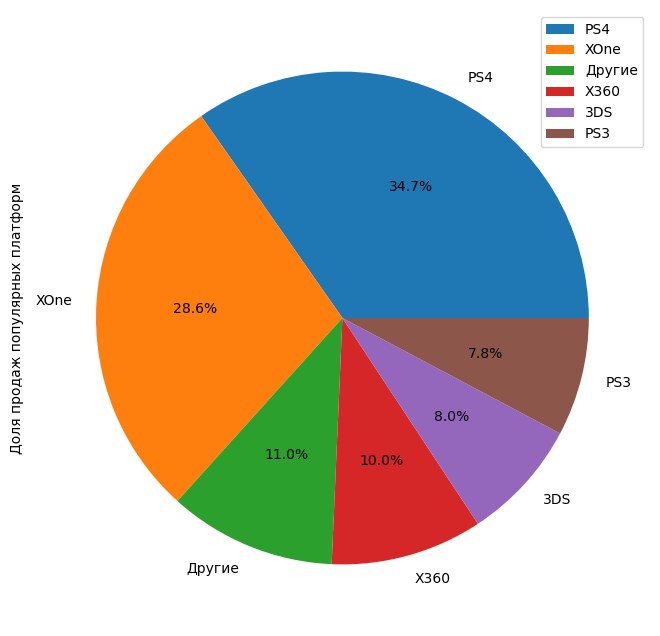

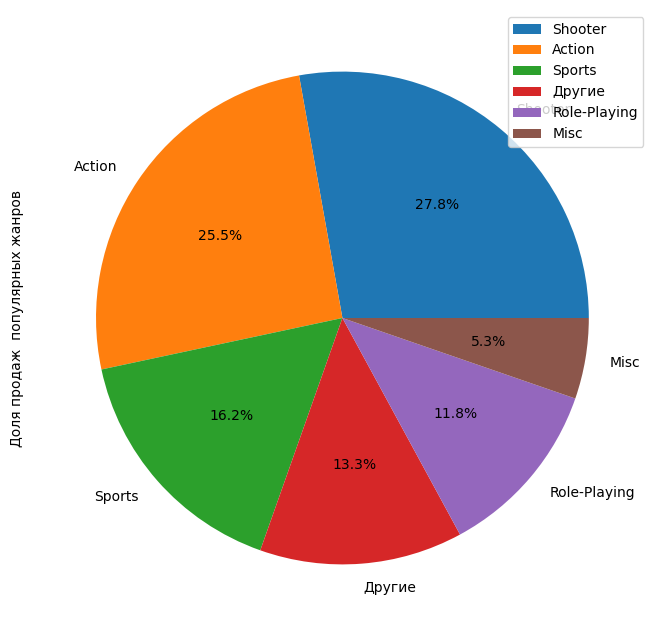

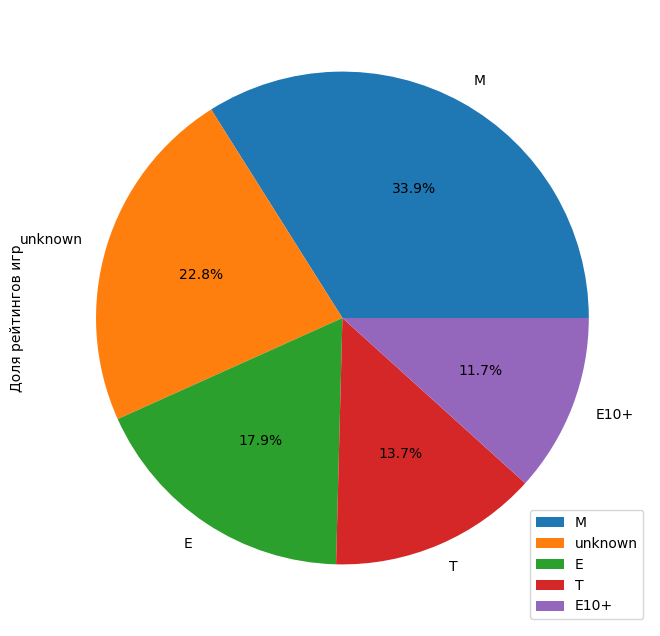

(<AxesSubplot:ylabel='Доля продаж популярных платформ'>,
 <AxesSubplot:ylabel='Доля продаж  популярных жанров'>,
 <AxesSubplot:ylabel='Доля рейтингов игр'>)

In [85]:
user_portrait('na_sales')

**Выводы:**

- Самые популярные платформы:
Более 50% рынка занимают такие популярные платформы, как: *PS4 (34.8%) и XOne (28.6%)*
- Самые популярные жанры:
Более 50% рынка занимают такие жанры, как: *Shooter (27.8%) и Action (25.5%)*
- Самый распространённый рейтинг: M

### Портрет пользователя Европы (EU)

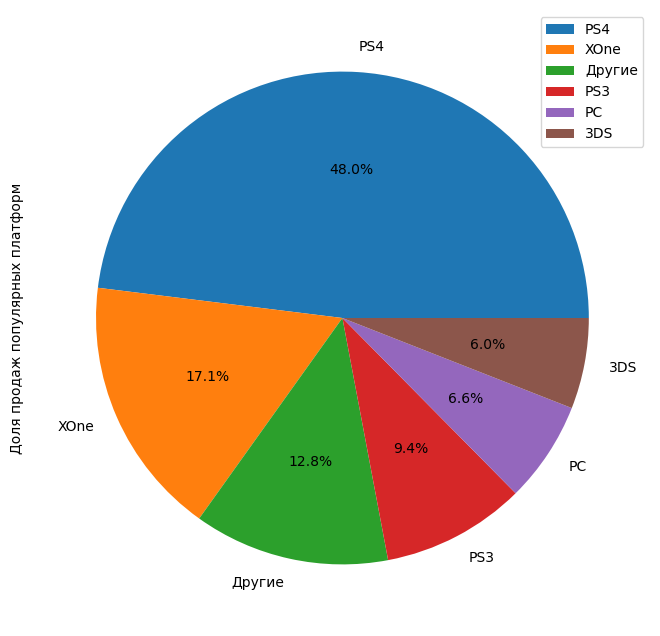

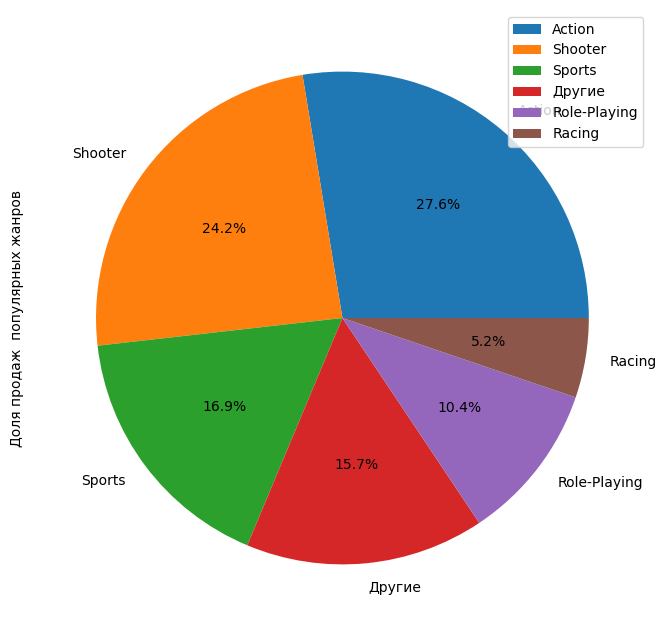

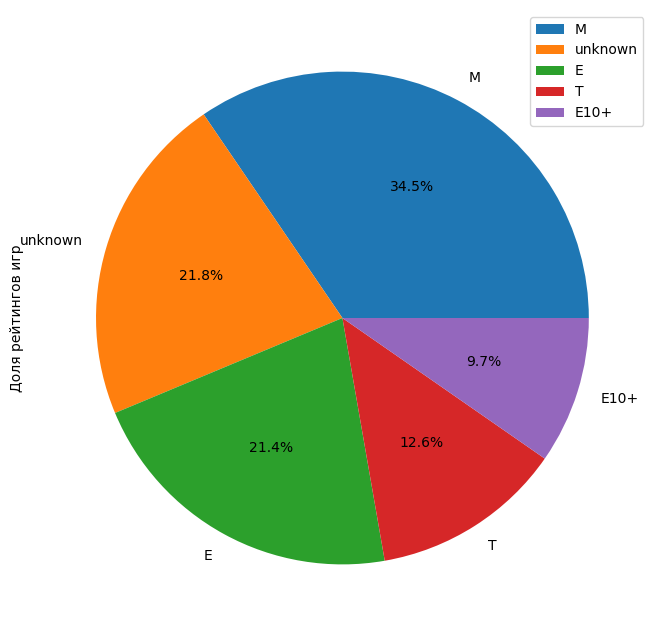

(<AxesSubplot:ylabel='Доля продаж популярных платформ'>,
 <AxesSubplot:ylabel='Доля продаж  популярных жанров'>,
 <AxesSubplot:ylabel='Доля рейтингов игр'>)

In [66]:
user_portrait('eu_sales')

**Выводы:**

- Самые популярные платформы:

Практически 50% рынка занимает платформа *PS4 (48.0%)*, на втором месте по популярности *XOne (17.1%)*
- Самые популярные жанры:

Более 50% рынка занимают такие жанры, как: *Shooter (27.6%) и Action (24.2%)*

Эти данные очень схожи с данными пользователей из Северной Америки
- Самый распространённый рейтинг: M (34.5%), второй по популярности Е (21.4%)

### Портрет пользователя Японии (JP)

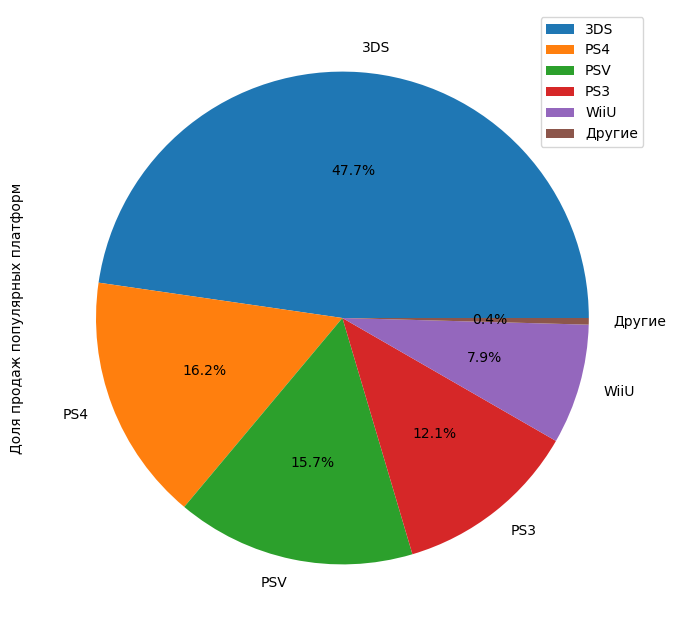

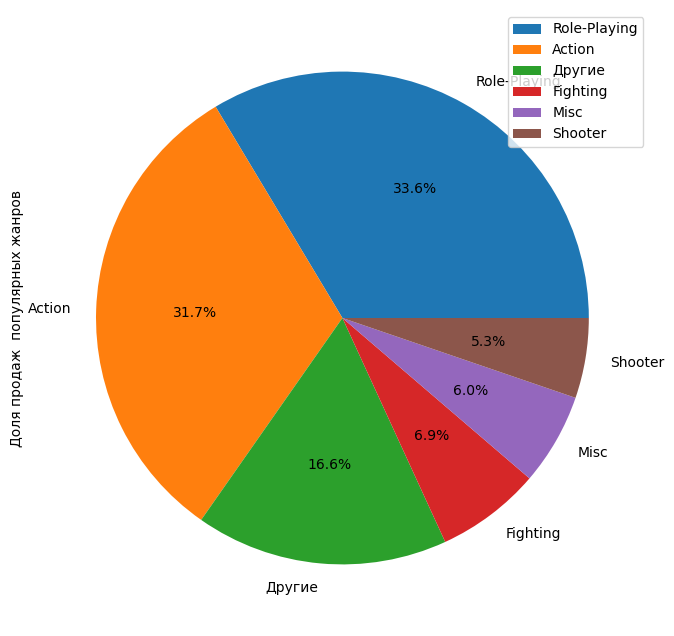

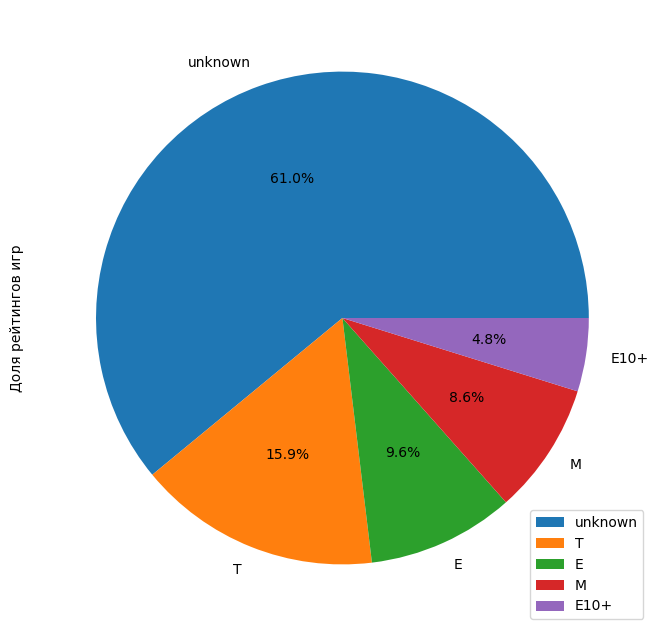

(<AxesSubplot:ylabel='Доля продаж популярных платформ'>,
 <AxesSubplot:ylabel='Доля продаж  популярных жанров'>,
 <AxesSubplot:ylabel='Доля рейтингов игр'>)

In [67]:
user_portrait('jp_sales')

In [68]:
#Проверим процент игр, выпущенных только для Японии с рейтингом unknown
len(data_actual.query('na_sales == 0 and eu_sales == 0 and rating == "unknown"')) / len(data_actual.query('rating == "unknown"'))

0.5747282608695652

**Выводы:**

Ситуация на Японском рынке складывается немного иначе.

- Самые популярные платформы:

Практически 50% рынка занимает платформа *3DS (47.7%)*, которая для Северной Америки и Европы не входила даже в 10% от общей доли платформ.

Второе и третье место занимают *PS4 (16.2%) и PSV (15.7%)*. XOne явно не фигурирует на диаграмме, хотя для Северной Америки и Европы она занимала одну из лидирующих позиций.

- Самые популярные жанры:

Более 50% рынка занимают такие жанры, как: *Role-Playing (33.6%), который для Северной Америки и Европы не входила даже в 12% от общей доли

и Action (31.7%)*
- Самый распространённый рейтинг: неизвестен

Это можно объяснить тем, что игры, которые выходили только для японского рынка не имеют указанный рейтинг (а таких игр 57%), т.к. в Японии законодательно необязательно указывать рейтинги, но всё же компании стараются присуждать рейтинги своим играм.

Для иностранных геймдев-компаний получение рейтинга обязательно.

Плюс к этому в Японии есть своя система рейтинга игр CERO, которая чаще всего оценивает консольные выпуски, а так же EOCS и Japan contents Review Center, для оценки игр на ПК. Эти огранизации не связаны с рейтингом ESRB, поэтому в данном случае можно однозначно утверждать, что *рейтинг ESRB не влияет на продажи в Японии*.

## Проверка гипотез

Наша гипотеза будет связана со средним значением генеральной совокупности и в общем виде сформулируется так:

Cредние двух генеральных совокупностей равны между собой

Наша альтернативная гипотеза будет двусторонней.

**Гипотеза H0:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза H1:**

Средние пользовательские рейтинги платформ Xbox One и PC разные

In [69]:
xone = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna()
pc = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()
print(f'Размер выборки для Xbox One {len(xone)}\nРазмер выборки для PC {len(pc)}')

Размер выборки для Xbox One 165
Размер выборки для PC 122


Наши выборки достаточно велики, но не равны между собой, поэтому мы не можем точно утверждать, равны ли их диспресии между собой, примем значение параметра `equal_var` как `False`

Но т.к. в нашем распоряжении есть генеральные совокупности, может рассчитать дисперсии и проверить правильность утвержений)

In [70]:
#Дисперсия для XOne
np.var(data[data['platform'] == 'XOne']['user_score'].dropna())

1.8965187072753906

In [71]:
#Дисперсия для PC
np.var(data[data['platform'] == 'PC']['user_score'].dropna())

2.346109390258789

In [72]:
data[data['platform'] == 'XOne']['user_score'].dropna().mean()

6.521427154541016

In [73]:
data[data['platform'] == 'PC']['user_score'].dropna().mean()

7.065957546234131

Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Мы можем воспользоваться t-тестом, т.к. наши выборки не зависят друг от друга и они достаточно велики, чтобы их выборочные средние были нормально распределены.

In [74]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 11%

У нас не получилось отвергнуть нулевую гипотезу, следовательно можно говорить о том, что средние пользовательские рейтинги платформ Xbox One и PC достаточно близки друг к другу и это не противоречит нашей гипотезе.

Вторая гипотеза будет так же связана со средним значением генеральной совокупности и в общем виде сформулируется так:


Cредние двух генеральных совокупностей не равны между собой

Наша альтернативная гипотеза будет двусторонней.

**Гипотеза H0:**

Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза H1:**

Средние пользовательские рейтинги жанров Action и Sports разные.

In [75]:
action = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
sports = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()
print(f'Размер выборки для Action {len(action)}\nРазмер выборки для Sports {len(sports)}')

Размер выборки для Action 297
Размер выборки для Sports 127


Наши выборки достаточно велики, но не равны между собой, поэтому мы не можем точно утверждать, равны ли их диспресии между собой, примем значение параметра `equal_var` как `False`

Но т.к. в нашем распоряжении есть генеральные совокупности, может рассчитать дисперсии и проверить правильность утвержений)

In [76]:
#Дисперсия для XOne
np.var(data[data['genre'] == 'Action']['user_score'].dropna())

2.0263707637786865

In [77]:
#Дисперсия для PC
np.var(data[data['genre'] == 'Sports']['user_score'].dropna())

2.6206295490264893

In [78]:
data[data['genre'] == 'Action']['user_score'].dropna().mean()

7.0581135749816895

In [79]:
data[data['genre'] == 'Sports']['user_score'].dropna().mean()

6.951431751251221

Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Мы можем воспользоваться t-тестом, т.к. наши выборки не зависят друг от друга и они достаточно велики, чтобы их выборочные средние были нормально распределены.

In [80]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825638224397033e-14
Отвергаем нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие крайне мало.

Отвергаем нулевую гипотезу, следовательно можно говорить о том, что средние пользовательские рейтинги жанров Action и Sports различаются, а это противоречит нашей гипотезе.

Возможно здесь всё дело в том, что одна выборка более, чем в два раза больше другой. Так же жанр Action был более популярный и имел более высокие оценки, чем Sports, если судить по актуальной выборке.

In [81]:
data_actual.pivot_table(index='genre', values='user_score')

,user_score
genre,
Action,6.760606
Adventure,7.470213
Fighting,6.983784
Misc,6.968293
Platform,6.741379
Puzzle,7.975000
Racing,6.327451
Role-Playing,7.348571
Shooter,6.549074


# Выводы

Самых популярные платформы набрали свою популярность примерно в 2000-х годах:
- Sony PlayStation 2 (PS2)
- Xbox 360 (X360)
- Sony PlayStation 3 (PS3)
- Nintendo Wii (Wii)
- Nintendo DS (DS)
- PlayStation (PS)

Но до 2016 года дожили такие платформы, как: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.

Можно заметить, что эти платформы преемники своих старших братьев, кроме PC, хоть компьютер и не пользовался такой высокой популярностью как консоли, он хорошо себя показывает до сих пор.

**Абсолютным лидером по глобальным продажам является жанр Shooter**

*Топ-3 не популярных жанра по глобальным продажам*:
- Puzzle
- Strategy
- Adventure

**Абсолютным лидером по количеству выпускаемых игр является жанр Action.** (613 игр за 3 года)

*Топ-3 не популярных жанра по количеству продаж*:
- Platform
- Strategy
- Puzzle


**Прибыльность рынков по странам:**
- Северная Америка 54.2%
- Европа 29.8%
- Япония 16%

Самые популярные жанры для Европы и Северной Америки:
- Shooter
- Action
- Sports
- Role-Playing 

Самые популярные жанры для Японии:
- Role-Playing
- Action
- Fighting 
- Misc
- Shooter 

**Самый популярный рейтинг для Европы и Северной Америки: М**. Игры с таким рейтингом содержат контент, подходящий для детей от 17 лет и старше.

Для Японии же популярный жанр определить не удалось в виду особенностей оценки и законодательства.

По этим данным можно заметить, что рынок Японии имеет свои отличительные особенности и в выборе консоли и в выборе жанров.

**Самыми прибыльными платформами на данный момент являются Xbox One и PlayStation 4**. Кроме Японии, там большой популярностью пользуется портативная игровая консоль Nintendo 3DS.

Так же при изучении оценок критиков и пользователей получилось выявить некоторые интересные моменты:
- Игры с высокой оценкой критиков имеют более высокие продажи
- Игры с низкой оценкой пользователей могут иметь продажи выше, чем игры с более высокой оценкой. Вероятнее всего эти игры стали культурной особенностью (мемом, например) или же они настолько плохи, что в них обязательно нужно сыграть). В нашем случае выделяется FIFA 16

Так же были выдвинуты несколько гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, данную гипотезу опровергнуть не удалось.
- Средние пользовательские рейтинги жанров Action и Sports одинаковые, данная гипотеза была опровергнута.

**Какие были выявлены закономерности, определяющие успешность игры:**
- Платформы: PlayStation 4 и Xbox One
- Жанр Shooter
- Рейтинг М
- Ориентированность на Североамериканский и Европейский рынок
- Оценка критиков практически не влияет на продажи игры, оценка пользователей не влияет совсем.